# NGC 5533 (UGC 9133)

In [1]:
from IPython.display import HTML
from IPython.display import Image
import os
import scipy.interpolate as inter

%pylab
%matplotlib inline
%run ../../utils/load_notebook.py

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
from photometry import *

importing Jupyter notebook from photometry.ipynb
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
from instabilities import *

importing Jupyter notebook from instabilities.ipynb
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [4]:
from utils import *

importing Jupyter notebook from utils.ipynb


In [5]:
name = 'N5533'
gtype = 'SA(rs)ab'  #TODO: откуда
incl = 52.  #mean value
distance = 54.3 #Noordermeer
scale = 0.263 #kpc/arcsec

data_path = '../../data/ngc5533'
sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)

In [6]:
# plt.rcParams['image.cmap'] = 'hsv'
# plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.get_cmap('hsv')(np.linspace(0, 1.0, 12)))

In [7]:
%%javascript 
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h2 id="tocheading">Оглавление</h2>
<div id="toc"></div>

## Статьи

In [8]:
# TODO: add

## Разное

In [9]:
# Данные из NED
HTML('<iframe src=http://ned.ipac.caltech.edu/cgi-bin/objsearch?objname=ngc+5533&extend=no&hconst=\
73&omegam=0.27&omegav=0.73&corr_z=1&out_csys=Equatorial&out_equinox=J2000.0&obj_sort=RA+or+Longitude&of=pre_text&zv_breaker=\
30000.0&list_limit=5&img_stamp=YES width=1000 height=350></iframe>')

In [10]:
# Данные из HYPERLEDA
HTML('<iframe src=http://leda.univ-lyon1.fr/ledacat.cgi?o=ngc5533 width=1000 height=350></iframe>')

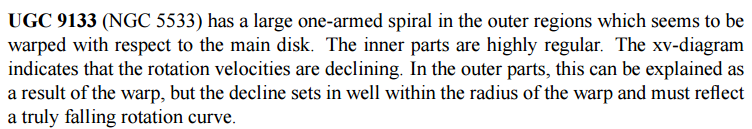

In [11]:
os.chdir(data_path)
Image('noordermeer_data/n5533_cite_p41.png')

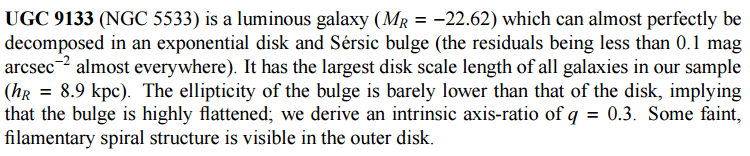

In [12]:
Image('noordermeer_data/n5533_cite_p110.png')

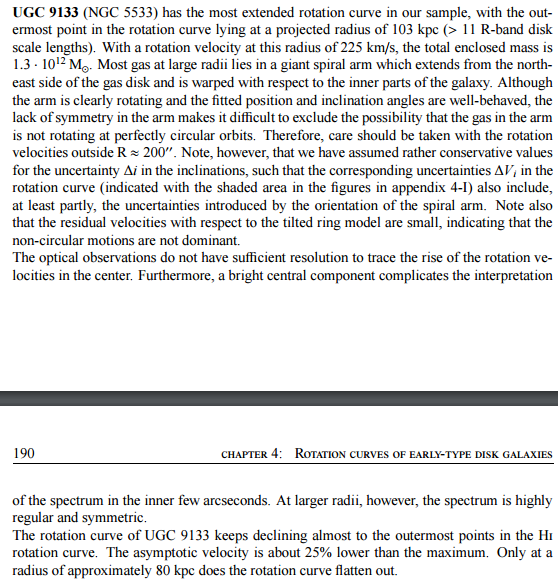

In [13]:
Image('noordermeer_data/n5533_cite_pp189_190.png')

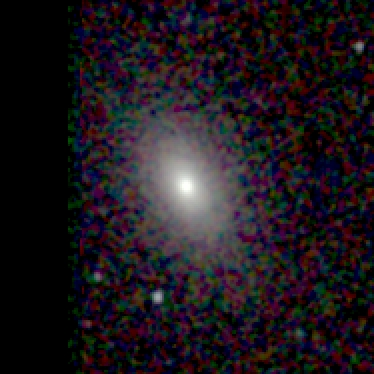

In [14]:
# 2MASS
Image('ngc5533_JHK.jpg')

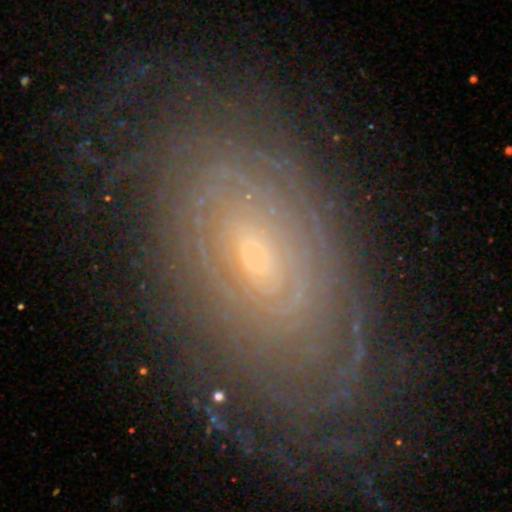

In [15]:
#SDSS
Image('ngc5533_SDSS.jpeg')

Из выборки http://cosmo.nyu.edu/hogg/rc3/ с маштабом:

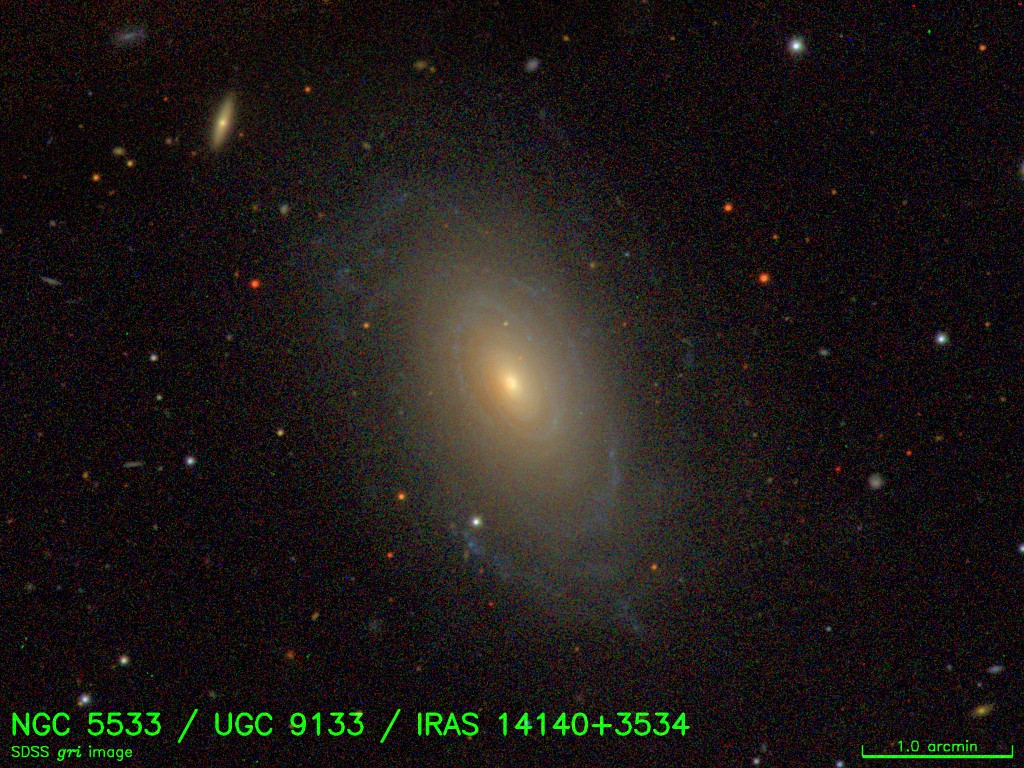

In [16]:
Image('ngc5533_SDSS_labeled.jpeg', width=500)

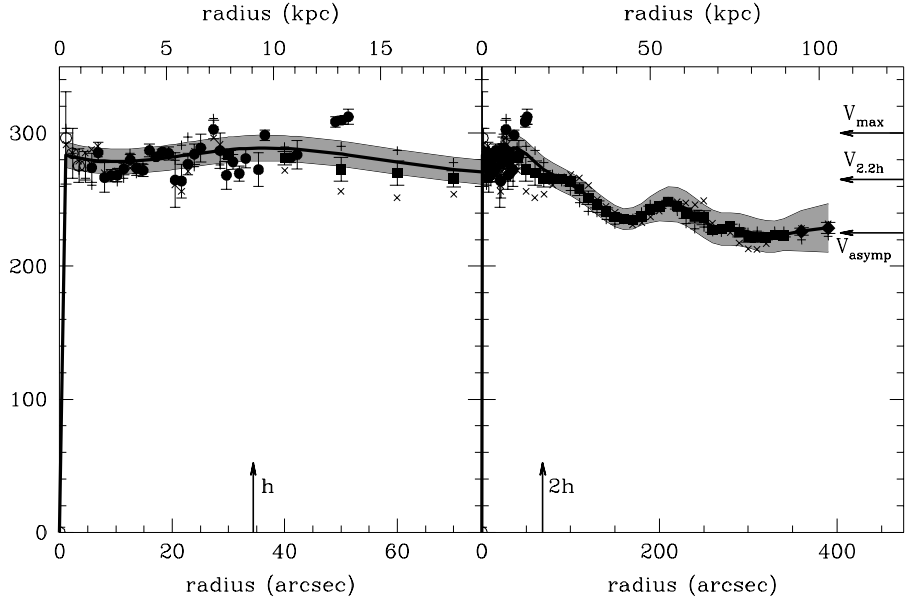

In [17]:
Image('noordermeer_data/n5533_rc.png')

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


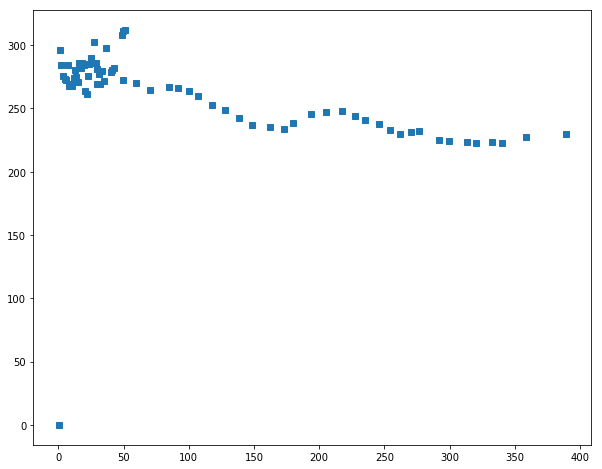

In [18]:
rn, veln = zip(*np.loadtxt("noordermeer_data/n5533_rc_noorderm.dat", float, delimiter=','))

fig = plt.figure(figsize=[10,8])
plt.plot(rn, veln, 's')
plt.legend();

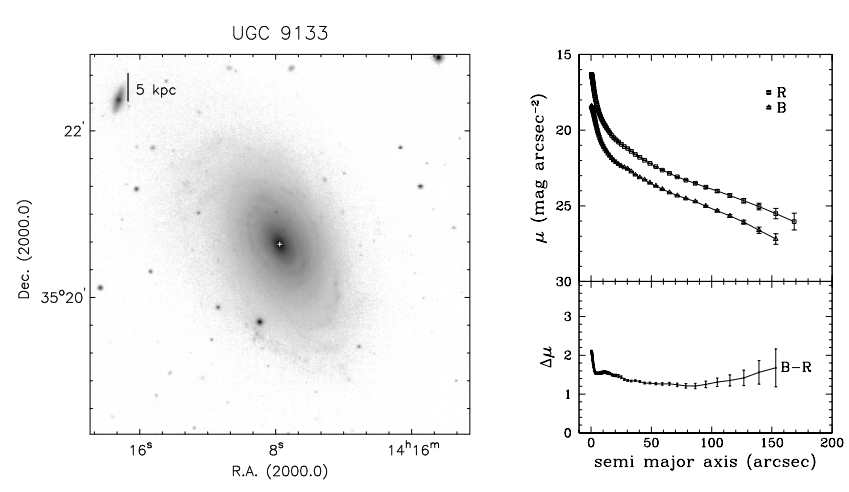

In [19]:
Image('noordermeer_data/n5533_photom.png')

## Кинематические данные по звездам

* Noordermeer 2008 https://ui.adsabs.harvard.edu/#abs/2008MNRAS.388.1381N/abstract

TODO: проверить данные и добавить ссылки, поисктаь еще

* http://adsabs.harvard.edu/cgi-bin/bib_query?2006ApJ...636..721B - кривая вращения до 80
* https://arxiv.org/pdf/1103.4928v1.pdf - 9133 

TODO: добавить данные

### Кривая вращения

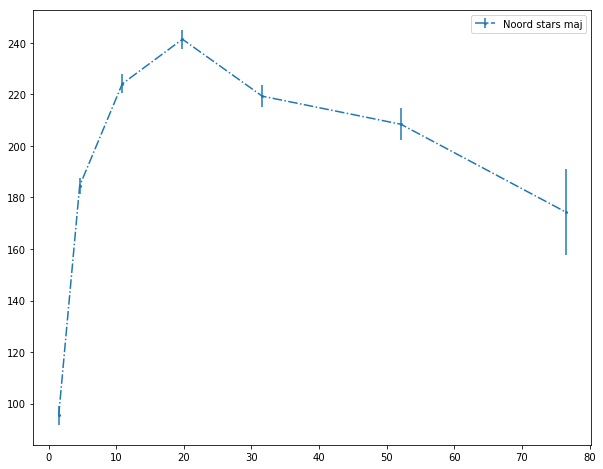

In [20]:
# Данные по звездной кинематике Noordermeer вдоль большей полуоси (исправленные за наклон?)
r_ma, vel_ma, e_vel_ma = zip(*np.loadtxt("v_stars_noord.dat", float))

fig = plt.figure(figsize=[10,8])
plt.errorbar(r_ma, vel_ma, e_vel_ma, fmt='-.', marker='.', mew=0, label="Noord stars maj")
plt.legend();

In [21]:
r_ma = [0.0] + list(r_ma)
vel_ma = [0.0] + list(vel_ma)
e_vel_ma = [1.0] + list(e_vel_ma)

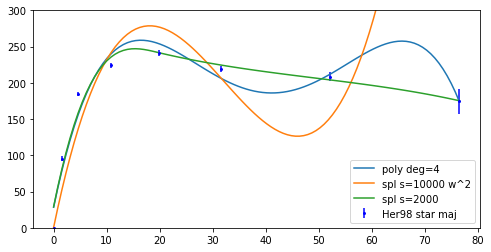

In [22]:
fig = plt.figure(figsize=[8,4])
plt.errorbar(r_ma, vel_ma, yerr=e_vel_ma, fmt='.', marker='.', mew=0, color='blue', label = 'Her98 star maj')

test_points = np.linspace(0.0, max(r_ma), 100)

poly_star = poly1d(polyfit(r_ma, vel_ma, deg=4))
plt.plot(test_points, poly_star(test_points), '-', label='poly deg=4')

def w(arr):
    return map(lambda l: 1/(l**2), arr)

import scipy.interpolate as inter

spl = inter.UnivariateSpline(r_ma, vel_ma, k=3, s=10000., w=w(e_vel_ma))
plt.plot(test_points, spl(test_points), '-', label='spl s=10000 w^2')

spl = inter.UnivariateSpline(r_ma, vel_ma, k=3, s=2000.)
plt.plot(test_points, spl(test_points), '-', label='spl s=2000')

plt.legend(loc='lower right')
plt.ylim(0, 300);

In [23]:
star_approx = spl

### Дисперсии

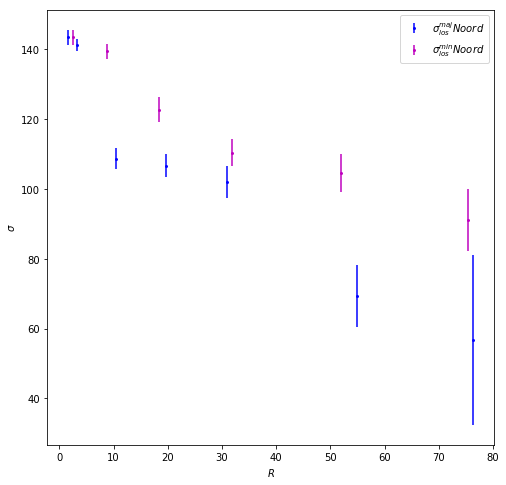

In [24]:
# Исправляем значения вдоль малой оси на синус угла:    
def correct_min(R):    
    return R / cos_i

r_sig_ma, sig_ma, e_sig_ma = zip(*np.loadtxt("s_stars_maN.dat", float))
r_sig_mi, sig_mi, e_sig_mi = zip(*np.loadtxt("s_stars_miN.dat", float))

fig = plt.figure(figsize=[8, 8])
plt.errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='blue', label=r'$\sigma_{los}^{maj} Noord$')
r_sig_mi = map(correct_min, r_sig_mi)
plt.errorbar(r_sig_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='m', label='$\sigma_{los}^{min} Noord$')
plt.xlabel('$R$')
plt.ylabel('$\sigma$')
plt.legend();

In [25]:
spl_min = inter.UnivariateSpline(r_sig_mi, sig_mi, k=3, s=100.)
sig_min_lim = max(r_sig_mi)

spl_maj = inter.UnivariateSpline(r_sig_ma, sig_ma, k=3, s=100.)
sig_maj_lim = max(r_sig_ma)

points = np.linspace(0.1, max(r_sig_ma)+15., 100)

In [26]:
@flat_end(sig_maj_lim)
def sig_R_maj_minmin(r, spl_maj=spl_maj):
    return spl_maj(r).item()

@flat_end(sig_maj_lim)
def sig_R_maj_min(r, spl_maj=spl_maj):
    return spl_maj(r).item()/sqrt(sin_i**2 + 0.49*cos_i**2)
    
@flat_end(sig_maj_lim)
def sig_R_maj_max(r, spl_maj=spl_maj):
    return spl_maj(r).item()/sqrt(0.5*sin_i**2 + 0.09*cos_i**2)

@flat_end(sig_maj_lim)
def sig_R_maj_maxmax(r, spl_maj=spl_maj):
    return spl_maj(r)*sqrt(2)/sin_i
    
@flat_end(sig_maj_lim)
def sig_R_maj_maxmaxtrue(r, spl_maj=spl_maj):
    return spl_maj(r)/sin_i/sqrt(sigPhi_to_sigR_real(r))

@flat_end(sig_min_lim)
def sig_R_minor_minmin(r, spl_min=spl_min):
    return spl_min(r).item()

@flat_end(sig_min_lim)
def sig_R_minor_min(r, spl_min=spl_min):
    return spl_min(r).item()/sqrt(sin_i**2 + 0.49*cos_i**2)
    
@flat_end(sig_min_lim)
def sig_R_minor_max(r, spl_min=spl_min):
    return spl_min(r).item()/sqrt(sin_i**2 + 0.09*cos_i**2)

@flat_end(sig_min_lim)
def sig_R_minor_maxmax(r, spl_min=spl_min):
    return spl_min(r)/sin_i

Для малой оси:

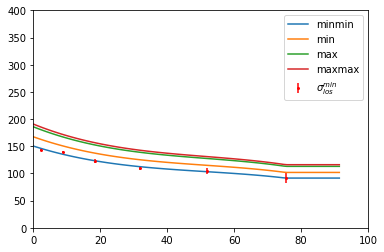

In [27]:
plt.errorbar(r_sig_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{min}$')

plt.plot(points, map(sig_R_minor_minmin, points), label = 'minmin')
plt.plot(points, map(sig_R_minor_min, points), label = 'min')
plt.plot(points, map(sig_R_minor_max, points), label = 'max')
plt.plot(points, map(sig_R_minor_maxmax, points), label = 'maxmax')

plt.legend()
plt.ylim(0,400)
plt.xlim(0,100);

Используем соотношение $\sigma_{\varphi}^{2}/\sigma_{R}^{2}$, которое описывается уравнением ${\displaystyle \sigma_{\varphi}^{2}/\sigma_{R}^{2}=0.5\left(1+\frac{R}{\bar{v}_{\varphi}}\frac{d\bar{v}_{\varphi}}{dR}\right)}$ (Binney & Tremaine, 1987)

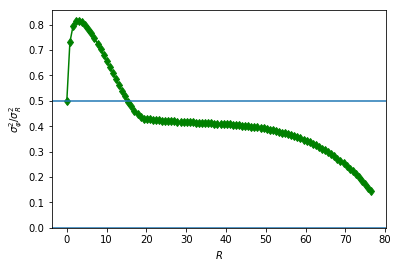

In [28]:
def sigPhi_to_sigR_real(R):
        return 0.5 * (1 + R*star_approx.derivative()(R) / star_approx(R))

plt.plot(test_points, [sigPhi_to_sigR_real(R) for R in test_points], 'd-', color='green')
plt.axhline(y=0.5)
plt.axhline(y=0.0)
plt.xlabel('$R$')
plt.ylabel(r"$\sigma_{\varphi}^2/\sigma_{R}^2$")
plt.ylim(0);

По большой:

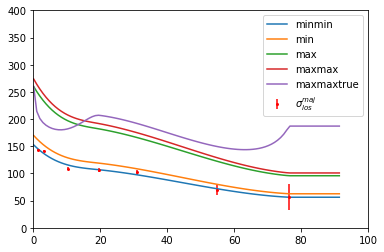

In [29]:
plt.errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$')
plt.plot(points, map(sig_R_maj_minmin, points), label = 'minmin')
plt.plot(points, map(sig_R_maj_min, points), label = 'min')
plt.plot(points, map(sig_R_maj_max, points), label = 'max')
plt.plot(points, map(sig_R_maj_maxmax, points), label = 'maxmax')
plt.plot(points, map(sig_R_maj_maxmaxtrue, points), label = 'maxmaxtrue')

plt.legend()
plt.ylim(0,400)
plt.xlim(0,100);

Сравним major vs minor оценки:

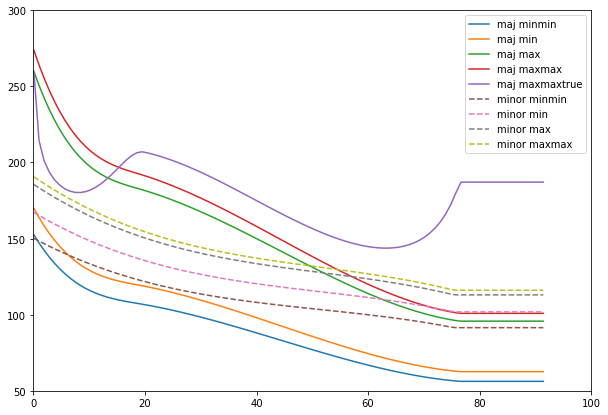

In [30]:
fig = plt.figure(figsize=[10, 7])

plt.plot(points, map(sig_R_maj_minmin, points), label = 'maj minmin')
plt.plot(points, map(sig_R_maj_min, points), label = 'maj min')
plt.plot(points, map(sig_R_maj_max, points), label = 'maj max')
plt.plot(points, map(sig_R_maj_maxmax, points), label = 'maj maxmax')
plt.plot(points, map(sig_R_maj_maxmaxtrue, points), label = 'maj maxmaxtrue')

plt.plot(points, map(sig_R_minor_minmin, points), '--', label = 'minor minmin')
plt.plot(points, map(sig_R_minor_min, points), '--', label = 'minor min')
plt.plot(points, map(sig_R_minor_max, points), '--', label = 'minor max')
plt.plot(points, map(sig_R_minor_maxmax, points), '--', label = 'minor maxmax')

plt.legend()
plt.ylim(50,300)
plt.xlim(0,100);

Видно, что оценки из разных осей не согласуются друг с другом.

## Данные по газу

TODO: поискать еще данные и добавить статьи

* Silchenko https://ui.adsabs.harvard.edu/#abs/1998NewA....3...15S/abstract

TODO: добавить
* https://arxiv.org/pdf/1207.2729v1.pdf - HI кривая вращения
* https://arxiv.org/pdf/astro-ph/0703352v1.pdf - HI (WSRT)

### Кривая вращения

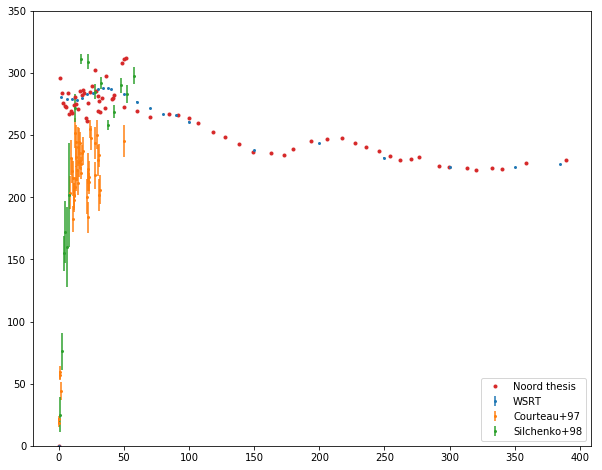

In [31]:
fig = plt.figure(figsize=[10,8])

# TODO: проверить как сняты данные
# Noordermeer+2007 ionized gas + HI (скорректированно за наклон)
r_wsrt, vel_wsrt, e_vel_wsrt = zip(*np.loadtxt("v_gas_WSRT.dat", float))

# Courteau97 ionized gas (не скорректированно за наклон!)
r_c, vel_c, e_vel_c = zip(*np.loadtxt("v_gas_Court.dat", float))
r_c, vel_c, e_vel_c = zip(*sorted(zip(np.abs(r_c), np.abs(vel_c), e_vel_c)))

# Sil'chenko O.K., Burenkov, A.N., Vlasyuk V.V., 1998 NewA 3, 15(не скорректированно за наклон!)
r_s, vel_s, e_vel_s = zip(*np.loadtxt("v_gas_SBV.dat", float))

plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'WSRT')
plt.errorbar(r_c, vel_c, yerr=e_vel_c, fmt='.', marker='.', mew=0, label = 'Courteau+97')
plt.errorbar(r_s, vel_s, yerr=e_vel_s, fmt='.', marker='.', mew=0, label = 'Silchenko+98')
plt.plot(rn, veln, '.', label = 'Noord thesis')
plt.ylim(0, 350)
plt.legend(loc='lower right');

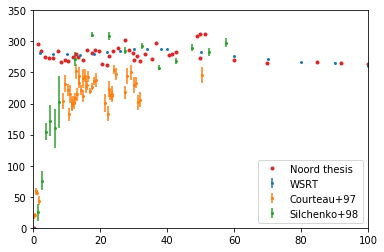

In [32]:
plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'WSRT')
plt.errorbar(r_c, vel_c, yerr=e_vel_c, fmt='.', marker='.', mew=0, label = 'Courteau+97')
plt.errorbar(r_s, vel_s, yerr=e_vel_s, fmt='.', marker='.', mew=0, label = 'Silchenko+98')
plt.plot(rn, veln, '.', label = 'Noord thesis')
plt.ylim(0, 350)
plt.xlim(0, 100)
plt.legend(loc='lower right');

Не согласуется - данные Сильченко накладываются на Ноордермеера, при этом они якобы не скорректированы за наклон, а Ноордермеер скорректирован. При этом данные Courteau действительно лучше скорректировать:

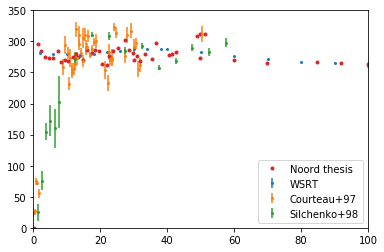

In [33]:
plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'WSRT')
plt.errorbar(r_c, map(lambda l: l/sin_i, vel_c), yerr=e_vel_c, fmt='.', marker='.', mew=0, label = 'Courteau+97')
plt.errorbar(r_s, vel_s, yerr=e_vel_s, fmt='.', marker='.', mew=0, label = 'Silchenko+98')
plt.plot(rn, veln, '.', label = 'Noord thesis')
plt.ylim(0, 350)
plt.xlim(0, 100)
plt.legend(loc='lower right');

Ну и что делать в центре - тоже не очень понятно. Приблизим как есть:

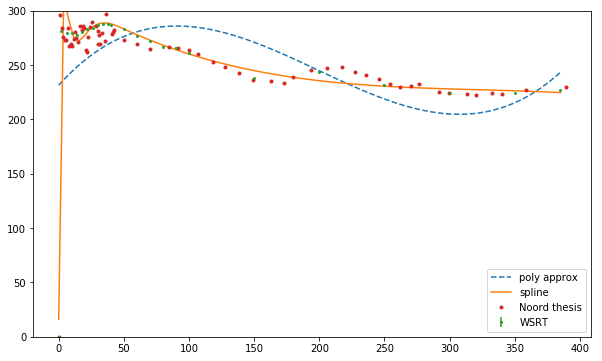

In [34]:
fig = plt.figure(figsize=[10,6])

gas_approx = poly1d(polyfit(r_wsrt, vel_wsrt, deg=3))
test_points = np.linspace(min(r_wsrt), max(r_wsrt), 100)
plt.plot(test_points, gas_approx(test_points), '--', label='poly approx')

spl_gas = inter.UnivariateSpline(r_wsrt, vel_wsrt, k=3, s=2400.)
plt.plot(test_points, spl_gas(test_points), '-', label='spline')

plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'WSRT')
plt.plot(rn, veln, '.', label = 'Noord thesis')
plt.ylim(0, 300)
plt.legend(loc='lower right');

И чуть получше:

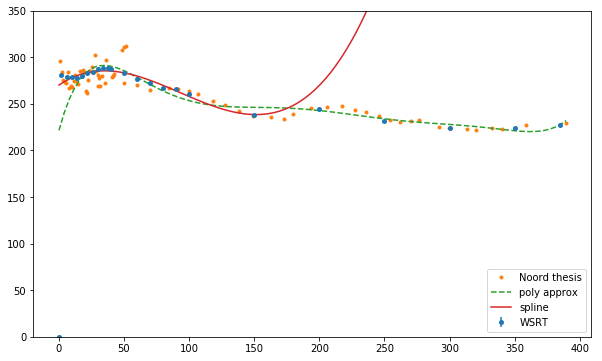

In [35]:
fig = plt.figure(figsize=[10,6])
plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=2, label = 'WSRT')
plt.plot(rn, veln, '.', label = 'Noord thesis')

gas_approx = poly1d(polyfit(rn, veln, deg=7))
test_points = np.linspace(min(rn), max(rn), 100)
plt.plot(test_points, gas_approx(test_points), '--', label='poly approx')

spl_gas = inter.UnivariateSpline(r_wsrt[3:-5], vel_wsrt[3:-5], k=3, s=5400.)
plt.plot(test_points, spl_gas(test_points), '-', label='spline')


plt.ylim(0, 350)
plt.legend(loc='lower right');

### Эпициклическая частота

Для случая бесконечного тонкого диска: $$\kappa=\frac{3}{R}\frac{d\Phi}{dR}+\frac{d^2\Phi}{dR^2}$$
где $\Phi$ - гравпотенциал, однако его знать не надо, т.к. есть проще формула: $$\kappa=\sqrt{2}\frac{\vartheta_c}{R}\sqrt{1+\frac{R}{\vartheta_c}\frac{d\vartheta_c}{dR}}$$

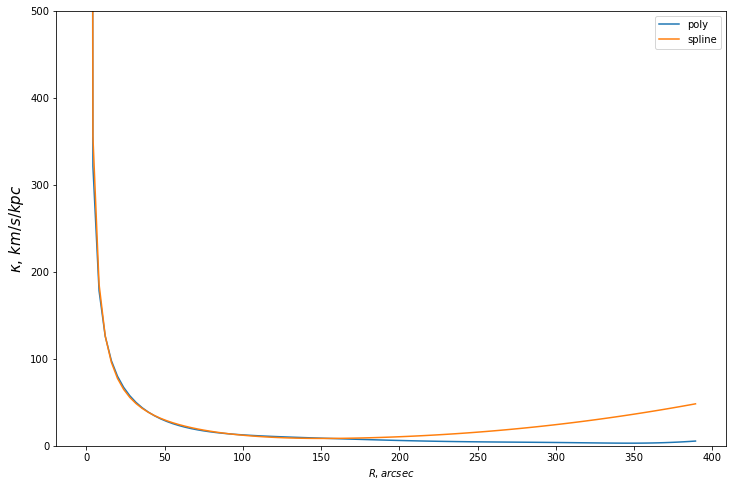

In [36]:
fig = plt.figure(figsize=[12, 8])
plt.plot(test_points, [epicyclicFreq_real(gas_approx, x, scale) for x in test_points], '-', label='poly')
plt.plot(test_points, [epicyclicFreq_real(spl_gas, x, scale) for x in test_points], '-', label='spline')
plt.xlabel('$R, arcsec$')
plt.ylabel('$\kappa,\, km/s/kpc$', fontsize=15)
plt.ylim(0, 500)
plt.legend();

Удивительно гладко даже для такой точности аппроксимации.

### Поверхностная плотность газа 

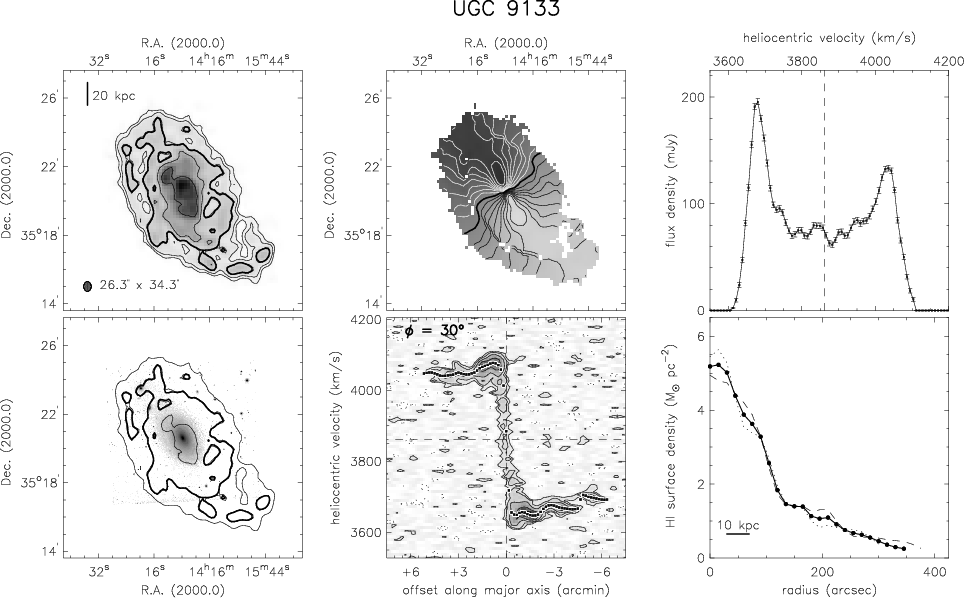

In [37]:
Image('ugc9133.png')

Плотность HI:

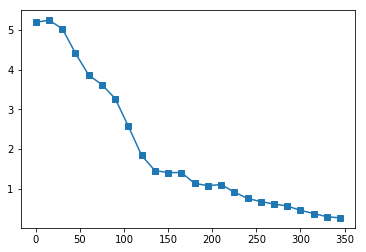

In [38]:
r_g_dens, gas_dens = zip(*np.loadtxt("gas_density.dat", float))

plt.plot(r_g_dens, gas_dens, 's-');

TODO: поискать еще данных, в том числе по молекулярке

## Данные по фотометрии

Диплом: B, R ~ 150; макс диск 330 (M/L=5); J ~ 750

* Noordermeer 2007 https://ui.adsabs.harvard.edu/#abs/2007MNRAS.376.1480N/abstract
* Méndez-Abreu https://ui.adsabs.harvard.edu/#abs/2008A&A...478..353M/abstract в $J$
* http://adsabs.harvard.edu/cgi-bin/bib_query?1996ApJS..103..363C - $r$ полоса, старое
* http://adsabs.harvard.edu/cgi-bin/bib_query?1991A%26AS...91..469B - $R$, есть профиль, старое
* http://adsabs.harvard.edu/cgi-bin/bib_query?1998AJ....116.1626B - видимо $V$, данные в таблице онлайн
* http://iopscience.iop.org/article/10.1086/300490/pdf - M/L указано как 3.1
* https://arxiv.org/pdf/astro-ph/9704274v1.pdf - 6.8 в $В$ для максимального диска
* CALIFA http://adsabs.harvard.edu/abs/2016arXiv161005324M $g$, $r$, $i$

* Silchenko https://ui.adsabs.harvard.edu/#abs/1998NewA....3...15S/abstract - есть V и R_c (доступ через Sci-Hub, есть профиль)


* https://arxiv.org/pdf/1501.06826v1.pdf есть оценки M/L в V и в 3.6
* Две работы от McGaugh http://iopscience.iop.org/article/10.1086/432968/pdf и http://iopscience.iop.org/article/10.1088/0004-6256/148/5/77/pdf, в первой
$B-V \approx 0.77$ и различные оценки на $M/L$ в 27. для макс диска и более адекватные 2.5 и 3.4. Во второй $J-K_s \approx 0.94$.


In [39]:
all_photometry = []

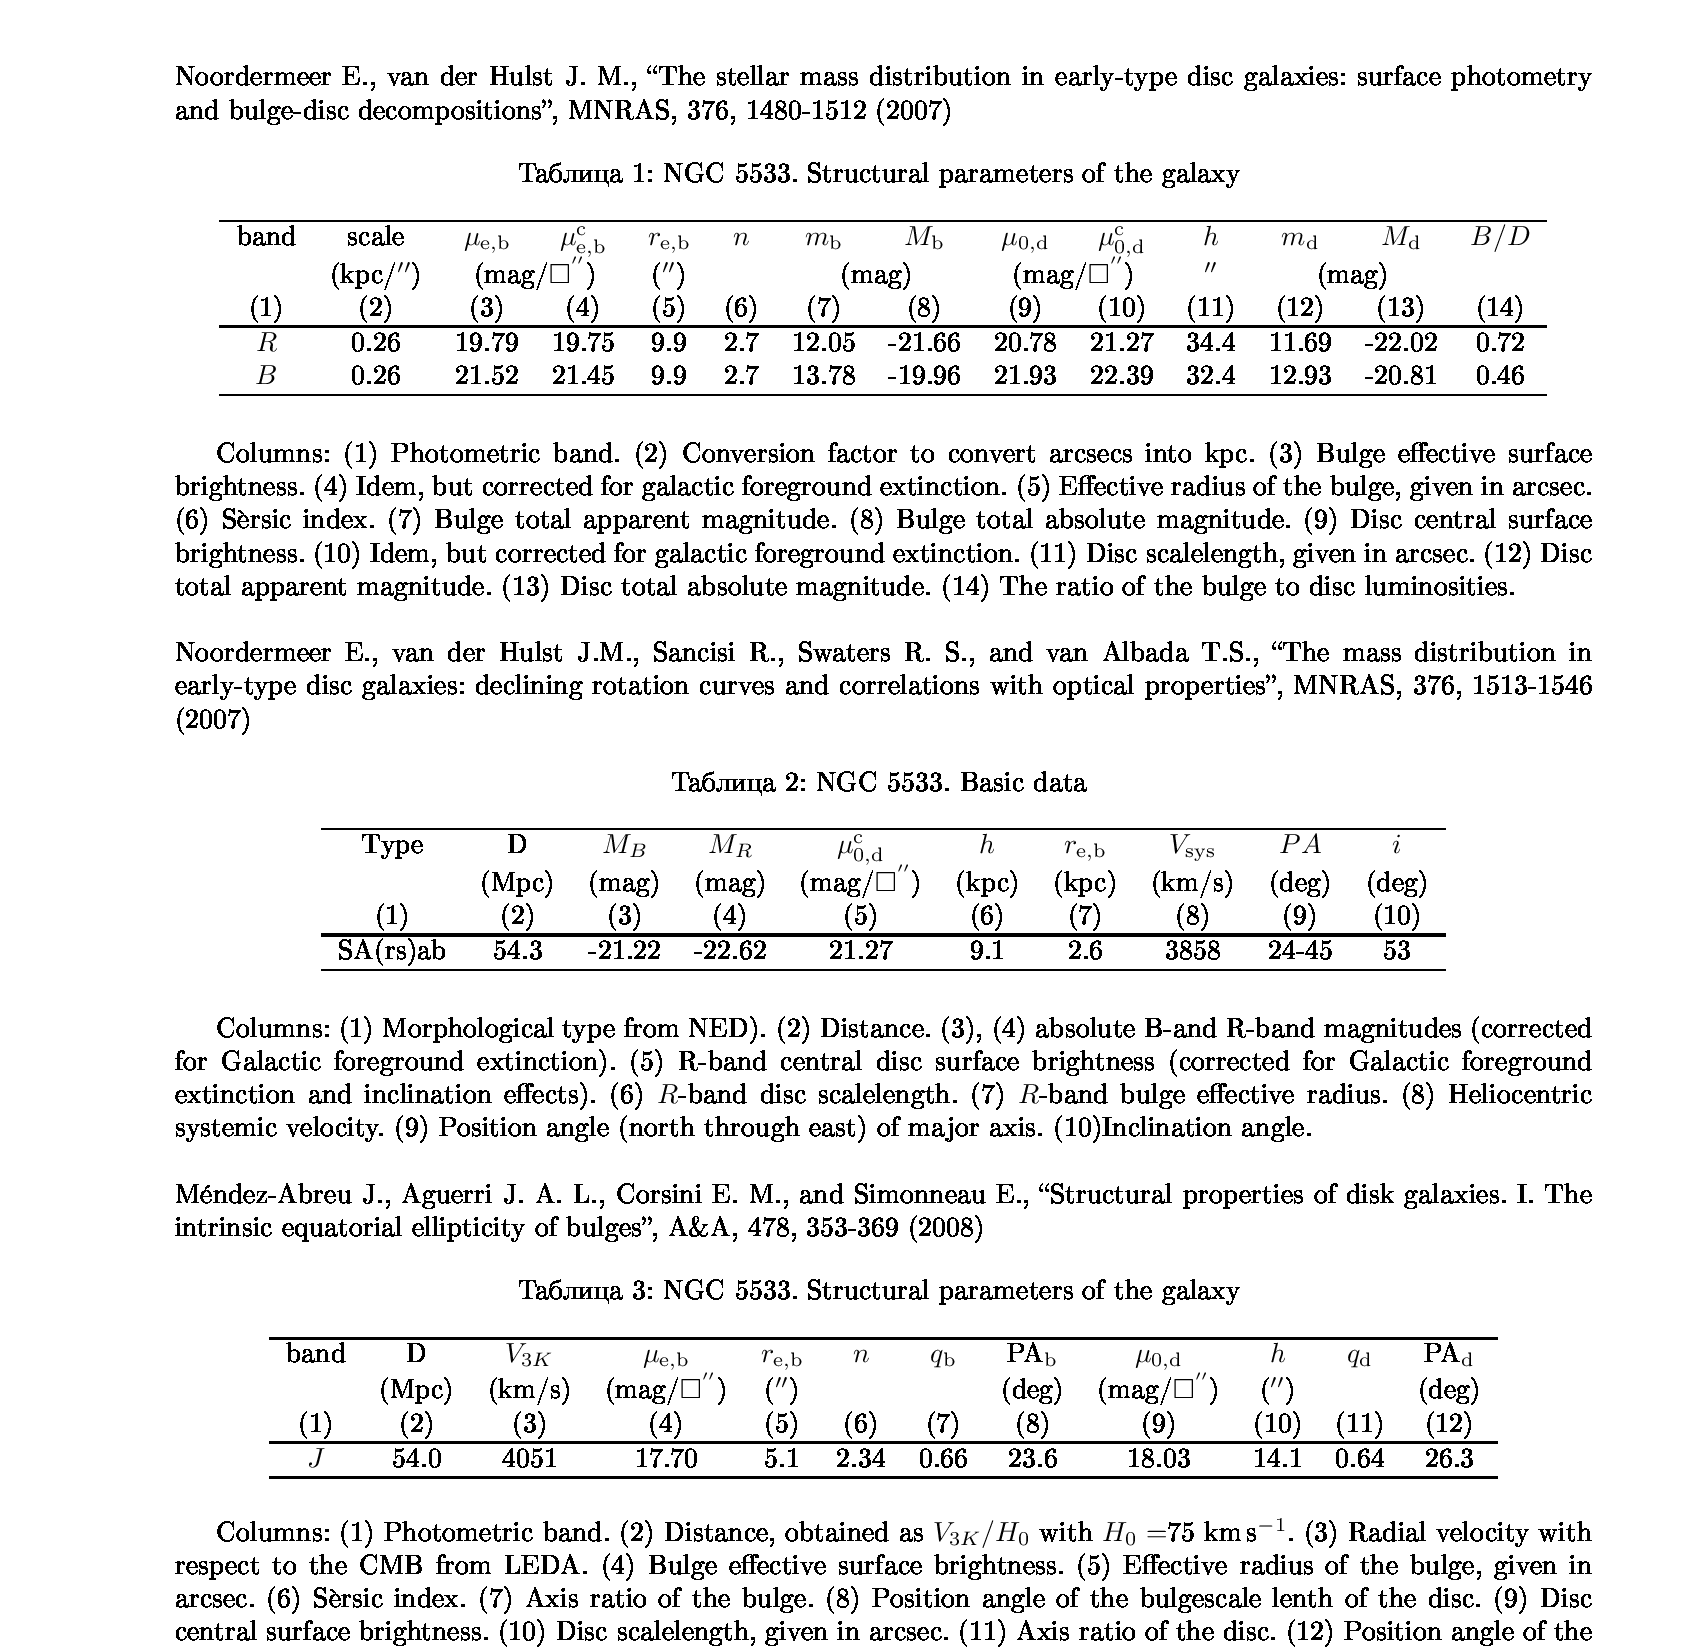

In [40]:
from wand.image import Image as WImage
img = WImage(filename='ngc5533.pdf', resolution=200)
img[:, 150:1800]

Фотометрия Ноордермеера:

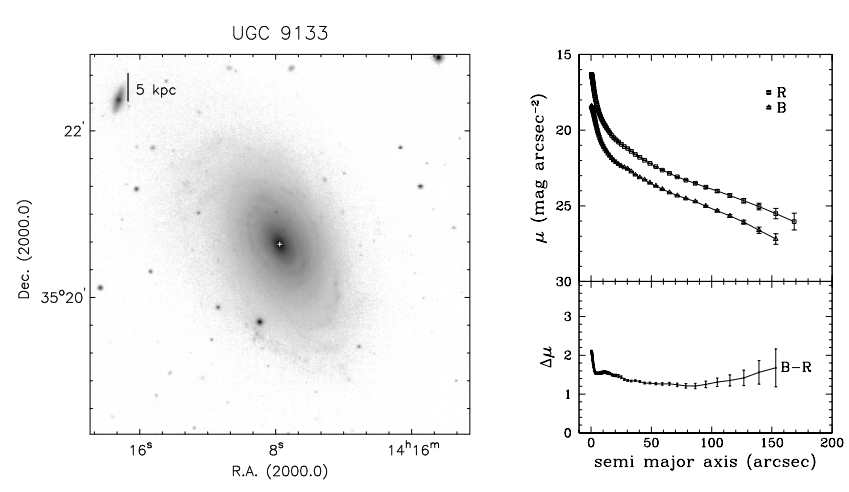

In [41]:
Image('noordermeer_data/n5533_photom.png')

Снятые R-данные:

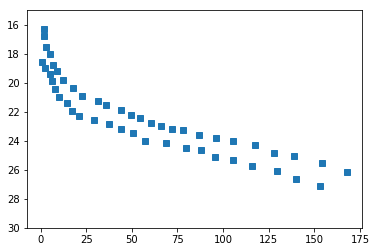

In [42]:
r_phot, mu_phot = zip(*np.loadtxt('noordermeer_data/n5533_noord_photoRB.dat', float, delimiter=','))

plt.plot(r_phot, mu_phot, 's')
plt.ylim(30, 15);

In [43]:
M_R = -22.02 #11.69 - это правильно? надо брать абсолютные? в дипломе были относительные, тут разница уже существенная
M_B = -20.81 #12.93

$$\log_{10}(M/L)=a_{\lambda} + b_{\lambda}\times Color$$

In [44]:
print 'Abs B : {:2.2f}; R: {:2.2f}.'.format(bell_mass_to_light(M_B-M_R, 'B', 'B-R'), bell_mass_to_light(M_B-M_R, 'R', 'B-R'))
print 'Rel B : {:2.2f}; R: {:2.2f}.'.format(bell_mass_to_light(12.93-11.69, 'B', 'B-R'), bell_mass_to_light(12.93-11.69, 'R', 'B-R'))

Abs B : 2.34; R: 2.01.
Rel B : 2.52; R: 2.11.


Разницы почти нет, так что можно использовать что-то одно. Фотометрии надо брать скорректированные:

In [45]:
# R-band
r_eff_R = 9.9
mu_eff_R = 19.79
n_R = 2.7
mu0d_R = 20.78
h_disc_R = 34.4

mu_eff_Rc = 19.75
mu0d_Rc = 21.27

In [46]:
# B-band
r_eff_B = 9.9
mu_eff_B = 21.52
n_B = 2.7
mu0d_B = 21.93
h_disc_B = 32.4

mu_eff_Bc = 21.45
mu0d_Bc = 22.39

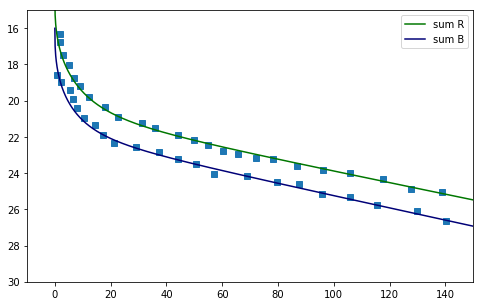

In [47]:
p_ = np.arange(0., 200., 0.1)

fig = plt.figure(figsize=[8, 5])
plt.plot(r_phot, mu_phot, 's')
plt.plot(p_, total_mu_profile([mu_bulge(l, mu_eff=mu_eff_R, r_eff=r_eff_R, n=n_R) for l in p_], 
                              [mu_disc(l, mu0=mu0d_R, h=h_disc_R) for l in p_]), '-', label='sum R', color='#007700')
plt.plot(p_, total_mu_profile([mu_bulge(l, mu_eff=mu_eff_B, r_eff=r_eff_B, n=n_B) for l in p_], 
                              [mu_disc(l, mu0=mu0d_B, h=h_disc_B) for l in p_]), '-', label='sum B', color='#000077')
plt.xlim(-10, 150)
plt.ylim(30, 15)
plt.legend();

Похоже.

1.21 1.24


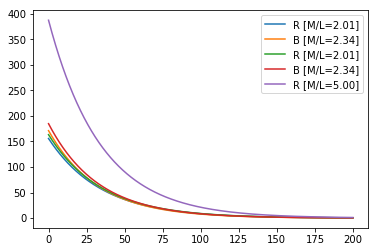

In [48]:
b_r_color = M_B-M_R

M_to_L_R = bell_mass_to_light(b_r_color, 'R', 'B-R')
surf_R = [surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=M_to_L_R, band='R') for l in p_]
plt.plot(p_, surf_R, '-', label='R [M/L={:2.2f}]'.format(M_to_L_R))

M_to_L_B = bell_mass_to_light(b_r_color, 'B', 'B-R')
surf_B = [surf_density(mu=mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), M_to_L=M_to_L_B, band='B') for l in p_]
plt.plot(p_, surf_B, '-', label='B [M/L={:2.2f}]'.format(M_to_L_B))

diploma_color = 12.93-11.69

M_to_L_Rc = bell_mass_to_light(diploma_color, 'R', 'B-R')
surf_R = [surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=M_to_L_Rc, band='R') for l in p_]
plt.plot(p_, surf_R, '-', label='R [M/L={:2.2f}]'.format(M_to_L_R))

M_to_L_Bc = bell_mass_to_light(diploma_color, 'B', 'B-R')
surf_B = [surf_density(mu=mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), M_to_L=M_to_L_Bc, band='B') for l in p_]
plt.plot(p_, surf_B, '-', label='B [M/L={:2.2f}]'.format(M_to_L_B))

print b_r_color, diploma_color

surf_R_ = [surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=5., band='R') for l in p_]
plt.plot(p_, surf_R_, '-', label='R [M/L={:2.2f}]'.format(5.))

plt.legend();

Как и получалось - примерно 150~170.

In [49]:
all_photometry.append(('Noorder R', r_eff_R, mu_eff_Rc, n_R, mu0d_Rc, h_disc_R, M_to_L_Rc, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=M_to_L_Rc, band='R')))
all_photometry.append(('Noorder B', r_eff_B, mu_eff_Bc, n_B, mu0d_Bc, h_disc_B, M_to_L_Bc, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), M_to_L=M_to_L_Bc, band='B')))

all_photometry.append(('Noorder R_max', r_eff_R, mu_eff_Rc, n_R, mu0d_Rc, h_disc_R, 5., 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=5., band='R')))

Méndez-Abreu фотометрия в $J$:

In [50]:
# J-band
r_eff_J = 5.1
mu_eff_J = 17.70
n_J = 2.34
mu0d_J = 18.03
h_disc_J = 14.1

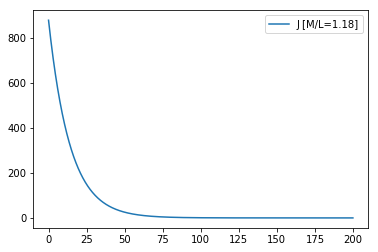

In [51]:
M_to_L_J = bell_mass_to_light(b_r_color, 'J', 'B-R')
surf_J = [surf_density(mu=mu_disc(l, mu0=mu0d_J, h=h_disc_J), M_to_L=M_to_L_J, band='J') for l in p_]
plt.plot(p_, surf_J, '-', label='J [M/L={:2.2f}]'.format(M_to_L_J))

plt.legend();

Получилось не то, что в дипломе - надо понять, почему.

TODO: понять почему отличается (M/L в дипломе другое)

In [52]:
all_photometry.append(('Mendez-Abreu J', r_eff_J, mu_eff_J, n_J, mu0d_J, h_disc_J, M_to_L_J, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_J, h=h_disc_J), M_to_L=M_to_L_J, band='J')))

SDSS $r$ полоса из http://adsabs.harvard.edu/cgi-bin/bib_query?1996ApJS..103..363C :

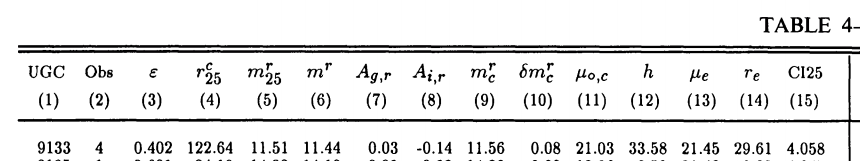

In [53]:
Image('r_data.png')

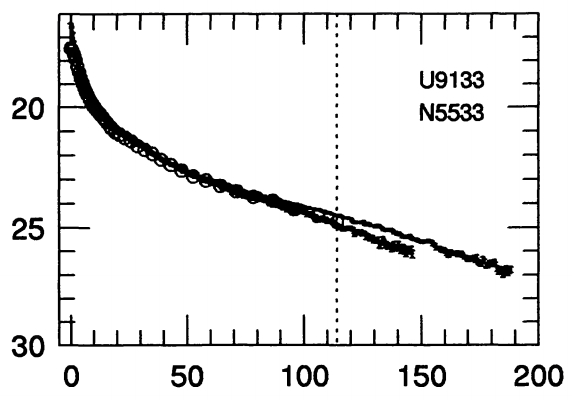

In [54]:
Image('r_photom.png')

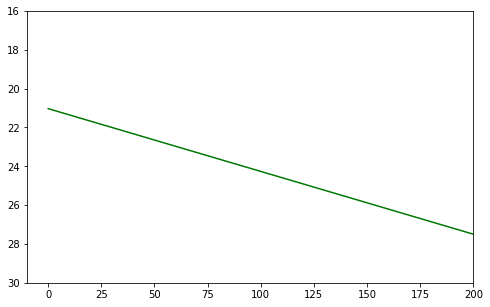

In [55]:
h = 33.58
mud = 21.03

fig = plt.figure(figsize=[8, 5])
plt.plot(p_, [mu_disc(l, mu0=mud, h=h) for l in p_], '-', color='#007700')

plt.xlim(-10, 200)
plt.ylim(30, 16)
plt.legend();

На взгляд похоже. Массовая модель - не можем посчитать, для этого надо знать цвет в SDSS полосе.

In [56]:
# M_to_L_r = bell_mass_to_light(b_r_color, 'r', 'B-R')
# surf_r = [surf_density(mu=mu_disc(l, mu0=mud, h=h), M_to_L=M_to_L_r, band='r') for l in p_]
# plt.plot(p_, surf_r, '-', label='r [M/L={:2.2f}]'.format(M_to_L_r))
# 
# plt.legend();

Еще одно в $R$ http://adsabs.harvard.edu/cgi-bin/bib_query?1991A%26AS...91..469B :

In [57]:
# R-band
mu_eff_R2 = 17.64
mu0d_R2 = 20.73
h_disc_R2 = 11.4/scale

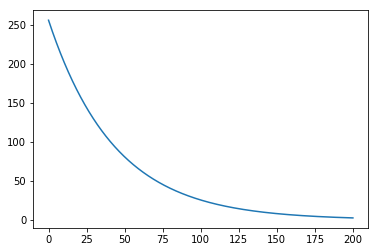

In [58]:
surf_R2 = [surf_density(mu=mu_disc(l, mu0=mu0d_R2, h=h_disc_R2), M_to_L=M_to_L_R, band='R') for l in p_]
plt.plot(p_, surf_R2, '-', label='R2 [M/L={:2.2f}]'.format(M_to_L_R));

Больше, но не сильно отличается в целом.

In [59]:
all_photometry.append(('1991 R', None, mu_eff_R2, None, mu0d_R2, h_disc_R2, M_to_L_R, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_R2, h=h_disc_R2), M_to_L=M_to_L_R, band='R')))

$V$ полоса из http://adsabs.harvard.edu/cgi-bin/bib_query?1998AJ....116.1626B :

In [60]:
# V-band
r_eff_V = 19.6
mu_eff_V = 21.62
n_V = 4.0 #это не точно
mu0d_V = 22.43
h_disc_V = 40.70

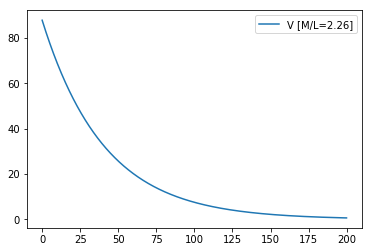

In [61]:
M_to_L_V = bell_mass_to_light(b_r_color, 'V', 'B-R')
surf_V = [surf_density(mu=mu_disc(l, mu0=mu0d_V, h=h_disc_V), M_to_L=M_to_L_V, band='V') for l in p_]
plt.plot(p_, surf_V, '-', label='V [M/L={:2.2f}]'.format(M_to_L_V))

plt.legend();

In [62]:
all_photometry.append(('1998 V', r_eff_V, mu_eff_V, n_V, mu0d_V, h_disc_V, M_to_L_V, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_V, h=h_disc_V), M_to_L=M_to_L_V, band='V')))

Бонус - данные из работы Сильченко 1998:

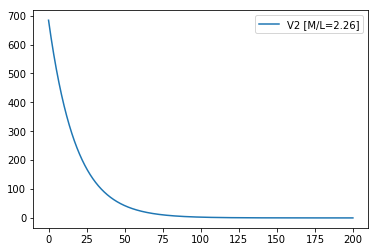

In [63]:
surf_V2 = [surf_density(mu=mu_disc(l, mu0=20.20, h=18.0), M_to_L=M_to_L_V, band='V') for l in p_]
plt.plot(p_, surf_V2, '-', label='V2 [M/L={:2.2f}]'.format(M_to_L_V))

plt.legend();

Тоже в пользу массивной говорит.

In [64]:
all_photometry.append(('Silchenko V', None, None, None, 20.20, 18.0, M_to_L_V, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=20.20, h=18.0), M_to_L=M_to_L_V, band='V')))

CALIFA $g$, $r$, $i$:

Тут данные не исправлены за поглощение, как написал Сережа, надо взять FOREGROUND GALACTIC EXTINCTION из NED и исправить.

Раньше я брал цвета из SDSS таблицы, но это было неверно и к тому же там было предупреждение что данные не точны.

In [65]:
A_lambda_g = 0.049
A_lambda_r = 0.034
A_lambda_i = 0.025

In [66]:
MUE_g =20.86990
Re_g =8.79792
n_g =3.3349
MU0_g =21.46726-A_lambda_g
hi_g =28.1701

MUE_r =20.0117
Re_r =8.88051
n_r =3.17403
MU0_r =20.7517-A_lambda_r
hi_r =28.0063


MUE_i =19.7457
Re_i =9.72462
n_i =3.20586
MU0_i =20.395-A_lambda_i
hi_i =28.0063

TODO: правильно ли исправлены яркости и вообще за поглощение

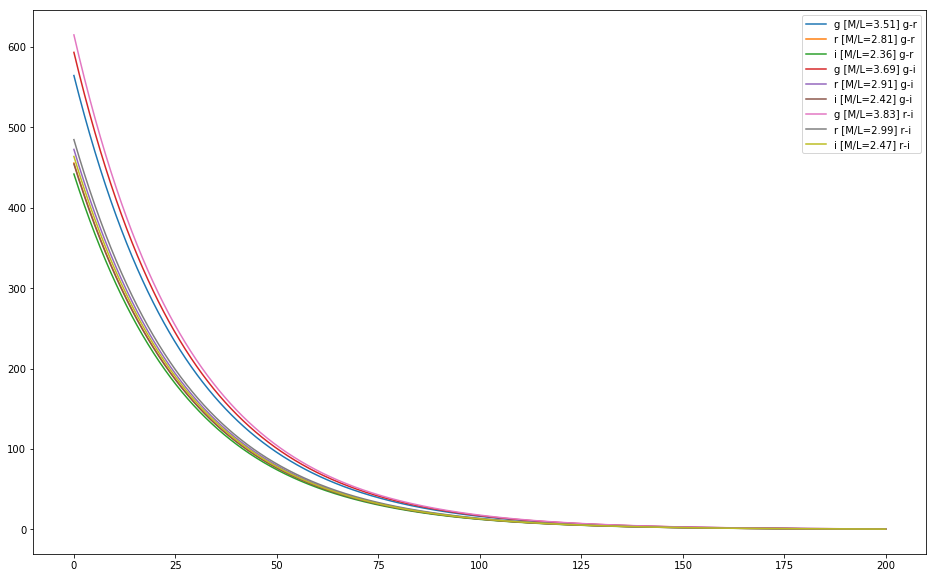

In [67]:
M_g = disc_totmag(MU0_g, hi_g, scale)
M_r = disc_totmag(MU0_r, hi_r, scale)
M_i = disc_totmag(MU0_i, hi_i, scale)

fig = plt.figure(figsize=[16, 10])

sdss_surf = []

for color_desc, color in [('g-r', M_g-M_r), ('g-i', M_g-M_i) , ('r-i', M_r-M_i)]:

    surf_g = [surf_density(mu=mu_disc(l, mu0=MU0_g, h=hi_g), M_to_L=bell_mass_to_light(color, 'g', color_desc), band='g') for l in p_]
    plt.plot(p_, surf_g, '-', label='g [M/L={:2.2f}] {}'.format(bell_mass_to_light(color, 'g', color_desc), color_desc))
    sdss_surf.append([surf_g[0], bell_mass_to_light(color, 'g', color_desc), 'g', color_desc])

    surf_r = [surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=bell_mass_to_light(color, 'r', color_desc), band='r') for l in p_]
    plt.plot(p_, surf_r, '-', label='r [M/L={:2.2f}] {}'.format(bell_mass_to_light(color, 'r', color_desc), color_desc))
    sdss_surf.append([surf_r[0], bell_mass_to_light(color, 'r', color_desc), 'r', color_desc])

    surf_i = [surf_density(mu=mu_disc(l, mu0=MU0_i, h=hi_i), M_to_L=bell_mass_to_light(color, 'i', color_desc), band='i') for l in p_]
    plt.plot(p_, surf_i, '-', label='i [M/L={:2.2f}] {}'.format(bell_mass_to_light(color, 'i', color_desc), color_desc))
    sdss_surf.append([surf_i[0], bell_mass_to_light(color, 'i', color_desc), 'i', color_desc])

plt.legend();

In [68]:
sorted(sdss_surf)

[[441.81692379163627, 2.356908827924959, 'i', 'g-r'],
 [454.29575169803388, 2.4234781648402093, 'i', 'g-i'],
 [455.45165846977864, 2.8094591607298205, 'r', 'g-r'],
 [463.70028670635702, 2.4736474326750004, 'i', 'r-i'],
 [472.44255479106369, 2.9142677138026651, 'r', 'g-i'],
 [484.59425864958399, 2.9892256486107147, 'r', 'r-i'],
 [564.30085979900275, 3.5149175937540864, 'g', 'g-r'],
 [593.10417955733249, 3.6943277321918315, 'g', 'g-i'],
 [614.80439638406597, 3.8294940580764529, 'g', 'r-i']]

Добавим экстремальные представители в таблицу (т.к. более-менее равномерно заполняет плоскость и чтобы были представлены все три модели):

In [69]:
all_photometry.append(('califa g (r-i)', Re_g, MUE_g, n_g, MU0_g, hi_g, 3.82, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=MU0_g, h=hi_g), M_to_L=3.82, band='g')))

all_photometry.append(('califa r (g-i)', Re_r, MUE_r, n_r, MU0_r, hi_r, 2.91, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=2.91, band='r'))) #модель из середины

all_photometry.append(('califa i (g-r)', Re_i, MUE_i, n_i, MU0_i, hi_i, 2.35, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=MU0_i, h=hi_i), M_to_L=2.35, band='i')))

Итоговая картинка (добавим еще максимальный диск для двух случаев):

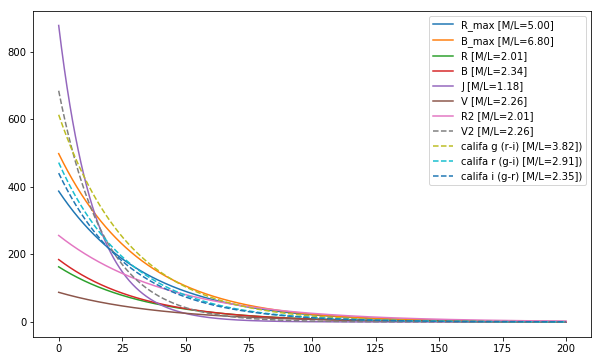

In [70]:
fig = plt.figure(figsize=[10, 6])

surf_R_max = [surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=5., band='R') for l in p_]
plt.plot(p_, surf_R_max, '-', label='R_max [M/L={:2.2f}]'.format(5.))

surf_B_max = [surf_density(mu=mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), M_to_L=6.8, band='B') for l in p_]
plt.plot(p_, surf_B_max, '-', label='B_max [M/L={:2.2f}]'.format(6.8))

plt.plot(p_, surf_R, '-', label='R [M/L={:2.2f}]'.format(M_to_L_R))
plt.plot(p_, surf_B, '-', label='B [M/L={:2.2f}]'.format(M_to_L_B))
plt.plot(p_, surf_J, '-', label='J [M/L={:2.2f}]'.format(M_to_L_J))
plt.plot(p_, surf_V, '-', label='V [M/L={:2.2f}]'.format(M_to_L_V))
plt.plot(p_, surf_R2, '-', label='R2 [M/L={:2.2f}]'.format(M_to_L_R))
plt.plot(p_, surf_V2, '--', label='V2 [M/L={:2.2f}]'.format(M_to_L_V))

#sdss photometry
plt.plot(p_, [all_photometry[-3][-1](l) for l in p_], '--', label='{} [M/L={:2.2f}])'.format(all_photometry[-3][0], all_photometry[-3][-2]))
plt.plot(p_, [all_photometry[-2][-1](l) for l in p_], '--', label='{} [M/L={:2.2f}])'.format(all_photometry[-2][0], all_photometry[-2][-2]))
plt.plot(p_, [all_photometry[-1][-1](l) for l in p_], '--', label='{} [M/L={:2.2f}])'.format(all_photometry[-1][0], all_photometry[-1][-2]))

plt.legend(loc='best');

TODO: понять, почему больше, чем в дипломе - там было 328 для макс. диска.

Очень противоречиво всё - в первом случае примерно разделяется на два вида, а во втором случае все возможные промежуточные значения тоже. Не ясно, что делать - брать такой разброс.

TODO: что делать?

In [71]:
show_all_photometry_table(all_photometry, scale)

+------+----------------+---------+----------+--------+---------+----------+-------+-------------+-----------+
|      | Name           |   r_eff |   mu_eff |      n |   mu0_d |   h_disc |   M/L | M_d/M_sun   |   Sigma_0 |
|------+----------------+---------+----------+--------+---------+----------+-------+-------------+-----------|
| 0.00 | Noorder R      |    9.90 |    19.75 |   2.70 |   21.27 |    34.40 |  2.11 | 8.40E+10.   |       163 |
| 1.00 | Noorder B      |    9.90 |    21.45 |   2.70 |   22.39 |    32.40 |  2.52 | 8.43E+10.   |       185 |
| 2.00 | Noorder R_max  |    9.90 |    19.75 |   2.70 |   21.27 |    34.40 |  5.00 | 1.99E+11.   |       387 |
| 3.00 | Mendez-Abreu J |    5.10 |    17.70 |   2.34 |   18.03 |    14.10 |  1.18 | 7.58E+10.   |       878 |
| 4.00 | 1991 R         |  nan    |    17.64 | nan    |   20.73 |    43.35 |  2.01 | 2.09E+11.   |       256 |
| 5.00 | 1998 V         |   19.60 |    21.62 |   4.00 |   22.43 |    40.70 |  2.26 | 6.32E+10.   |        88 |
|

Еще две проверки на данных металличности, профилей $g$,$r$ и $g-r$ цвета из CALIFA https://ui.adsabs.harvard.edu/#abs/2016A&A...585A..47M/abstract

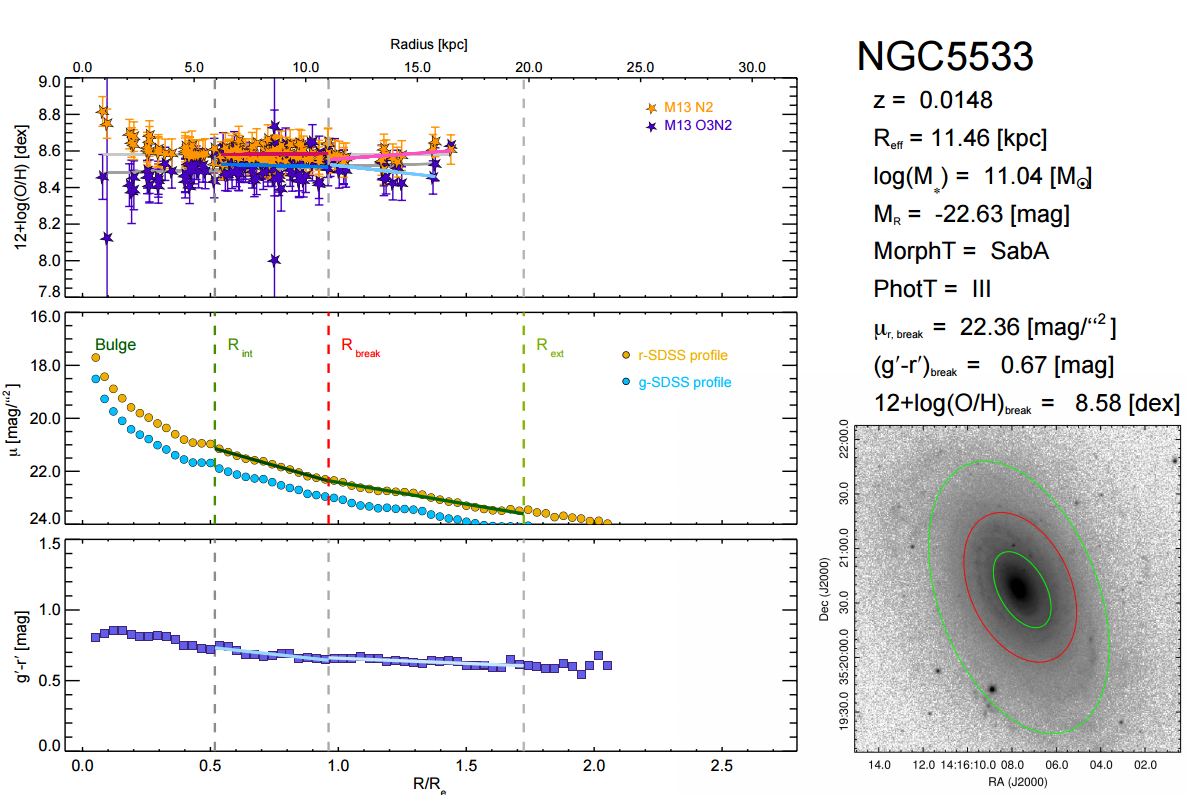

In [72]:
Image('califa_metal_color.png', width=800)

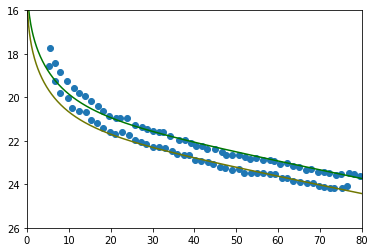

In [73]:
r_phot, mu_phot = zip(*np.loadtxt('rg_photom.dat', float, delimiter=','))

plt.plot(map(lambda l: l/scale, r_phot), mu_phot, 'o')
plt.plot(p_, total_mu_profile([mu_bulge(l, mu_eff=MUE_r, r_eff=Re_r, n=n_r) for l in p_], 
                              [mu_disc(l, mu0=MU0_r, h=hi_r) for l in p_]), '-', label='r', color='#007700')
plt.plot(p_, total_mu_profile([mu_bulge(l, mu_eff=MUE_g, r_eff=Re_g, n=n_g) for l in p_], 
                              [mu_disc(l, mu0=MU0_g, h=hi_g) for l in p_]), '-', label='g', color='#707700')
plt.ylim(26, 16)
plt.xlim(0, 80);

Я немного промахнулся там с центром, когда снимал - так что в целом очень даже похоже.

Теперь посмотрим на цвета и вычислим для них явно профиль при калиборовках Белла:

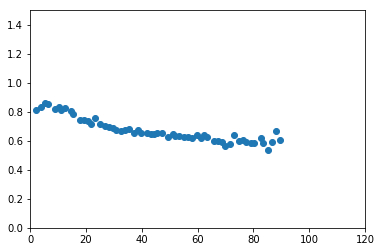

In [74]:
r_gr, gr_color = zip(*np.loadtxt('califa_gr_color.dat', float, delimiter=','))

plt.plot(map(lambda l: l/scale, r_gr), gr_color, 'o')
plt.ylim(0., 1.5)
plt.xlim(0, 120);

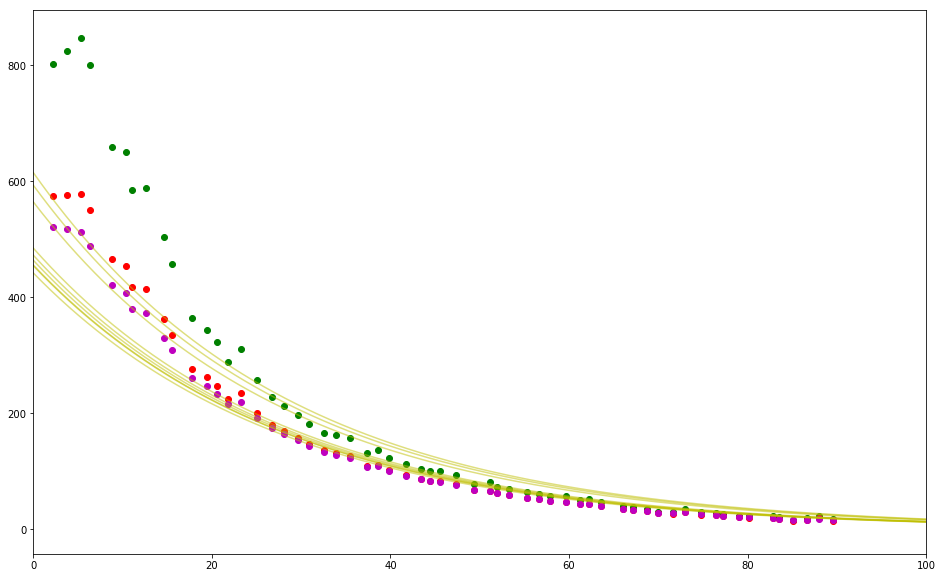

In [75]:
fig = plt.figure(figsize=[16, 10])

for color_desc, color in [('g-r', M_g-M_r), ('g-i', M_g-M_i) , ('r-i', M_r-M_i)]:

    surf_g = [surf_density(mu=mu_disc(l, mu0=MU0_g, h=hi_g), M_to_L=bell_mass_to_light(color, 'g', color_desc), band='g') for l in p_]
    plt.plot(p_, surf_g, '-', label='g [M/L={:2.2f}] {}'.format(bell_mass_to_light(color, 'g', color_desc), color_desc), color='y', alpha=0.5)

    surf_r = [surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=bell_mass_to_light(color, 'r', color_desc), band='r') for l in p_]
    plt.plot(p_, surf_r, '-', label='r [M/L={:2.2f}] {}'.format(bell_mass_to_light(color, 'r', color_desc), color_desc), color='y', alpha=0.5)

    surf_i = [surf_density(mu=mu_disc(l, mu0=MU0_i, h=hi_i), M_to_L=bell_mass_to_light(color, 'i', color_desc), band='i') for l in p_]
    plt.plot(p_, surf_i, '-', label='i [M/L={:2.2f}] {}'.format(bell_mass_to_light(color, 'i', color_desc), color_desc), color='y', alpha=0.5)
    
for r, gr in zip(r_gr, gr_color):

    surf_g = surf_density(mu=mu_disc(r/scale, mu0=MU0_g, h=hi_g), M_to_L=bell_mass_to_light(gr, 'g', 'g-r'), band='g')
    plt.scatter(r/scale, surf_g, color='g')

    surf_r = surf_density(mu=mu_disc(r/scale, mu0=MU0_r, h=hi_r), M_to_L=bell_mass_to_light(gr, 'r', 'g-r'), band='r')
    plt.scatter(r/scale, surf_r, color='r')
    
    surf_i = surf_density(mu=mu_disc(r/scale, mu0=MU0_i, h=hi_i), M_to_L=bell_mass_to_light(gr, 'i', 'g-r'), band='i')
    plt.scatter(r/scale, surf_i, color='m')

plt.xlim(0., 100);

Т.е. если судить по цветам и такой калибровке то скорее маломассивная модель верна.

### Сравнение с Кривой вращения тонкого диска

Можно провести тест-сравнение с кривой вращения тонкого диска при заданной фотометрии, если она слишком массивная - то не брать ее (это ограничение сверху).  

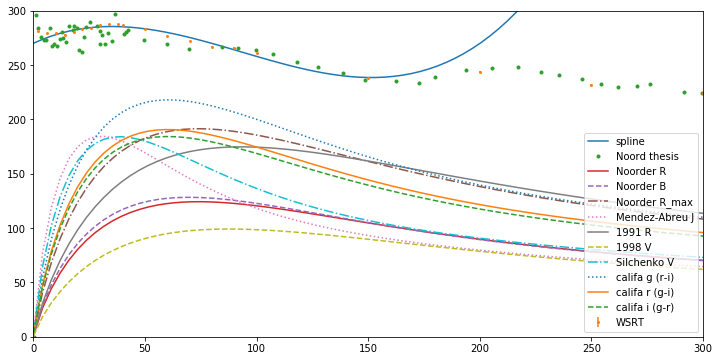

In [76]:
fig = plt.figure(figsize=[12,6])

plt.plot(test_points, spl_gas(test_points), '-', label='spline')

plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'WSRT')
plt.plot(rn, veln, '.', label = 'Noord thesis')

for photom in all_photometry:
    plt.plot(test_points, map(lambda l: disc_vel(l, photom[7](0), photom[5], scale), test_points), next(linecycler), label=photom[0])


plt.ylim(0, 300)
plt.xlim(0, 300)
plt.legend(loc='lower right');

Максимальная SDSS явно слишком большая; 1998V, Noordermeer, 1991R не похожи совпадением с максимумом.

## Зоны звездообразования


TODO: найти еще данные и сделать обоснованно

GALEX http://gsss.stsci.edu/webservices/vo/CatalogSearch.aspx?RA=214.032262&DEC=35.343830&SR=.002&FORMAT=HTML&CAT=GALEX там есть маааленькие картинки, но я не смог их посмотреть нормально

Оценка из SDSS изображения:

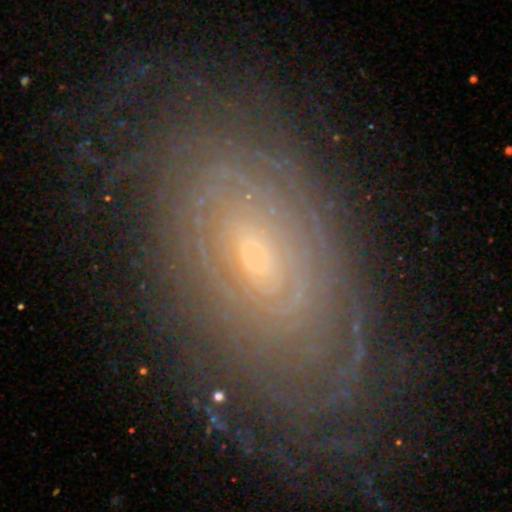

In [77]:
Image('ngc5533_SDSS.jpeg', width=400)

In [78]:
# несколько оценок протяженности
print 0.396*487/2
print 225*0.396
print 220*0.396

96.426
89.1
87.12


Данные GALEX с расстояниями http://galex.stsci.edu/GR6/?page=explore&photo=true&objid=6379289640342392624

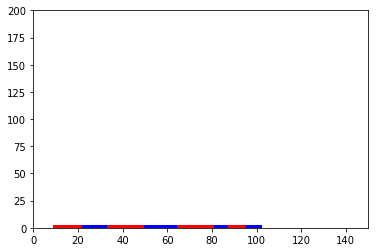

In [79]:
def plot_SF(ax):
    ax.plot([10., 95.], [0., 0.], '-', lw=7., color='red')
    ax.plot([58.*(60/149.), 78.*(60/149.)], [0., 0.], '-', lw=7., color='b') #спирали оценил из картинки SDSS с масштабом
    ax.plot([126.*(60/149.), 155.*(60/149.)], [0., 0.], '-', lw=7., color='b')
    ax.plot([204.*(60/149.), 212.*(60/149.)], [0., 0.], '-', lw=7., color='b')
    ax.plot([240.*(60/149.), 250.*(60/149.)], [0., 0.], '-', lw=7., color='b')
#      ax.plot([0., 85.], [0., 0.], '-', lw=7., color='b') #GALEX
    
plot_SF(plt.gca())
plt.xlim(0, 150)
plt.ylim(0, 200);

Исходя из данных в Chanial 2007 (https://www.aanda.org/articles/aa/pdf/2007/04/aa3881-05.pdf) получается по калибровкам $SFR \approx 2.6 M_{o} yr^{-1}$.

## Неустойчивость

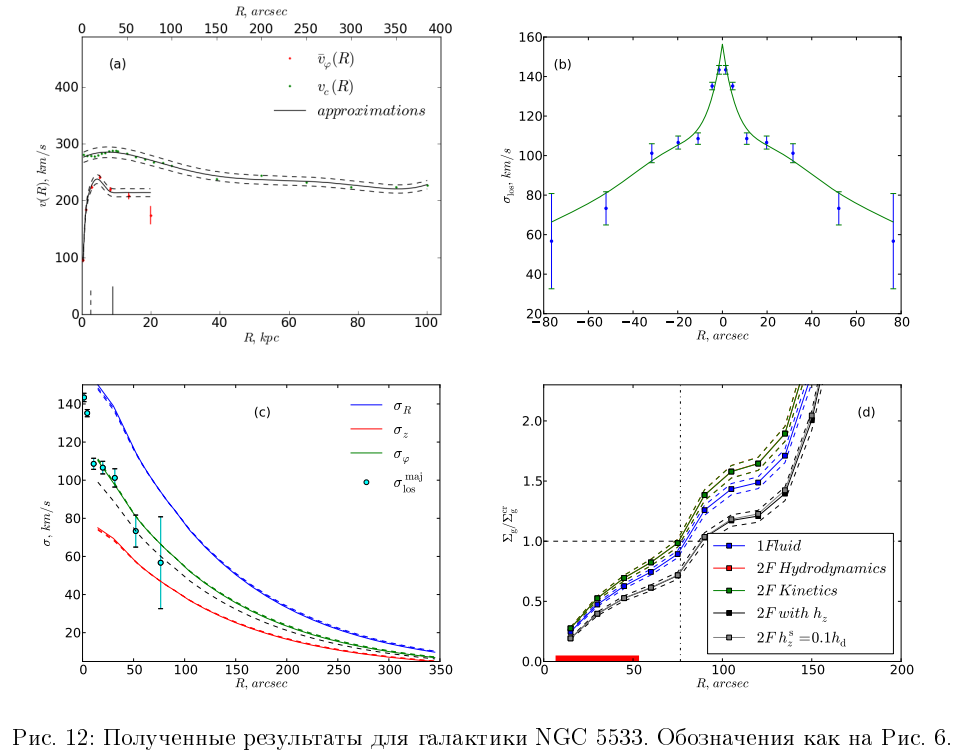

In [80]:
Image('diplom_result.png')

### Одножидкостная

Устойчиво, когда > 1:
$$Q_g = \frac{\Sigma_g^{cr}}{\Sigma_g}=\frac{\kappa c_g}{\pi G \Sigma_g}$$
$$Q_s = \frac{\Sigma_s^{cr}}{\Sigma_s}=\frac{\sigma_R}{\sigma_R^{min}}=\frac{\kappa \sigma_R}{3.36 G \Sigma_s}$$

In [81]:
sound_vel = 6.  #скорость звука в газе, км/с
data_lim = max(max(r_sig_ma), max(r_sig_mi)) #где заканчиваются данные

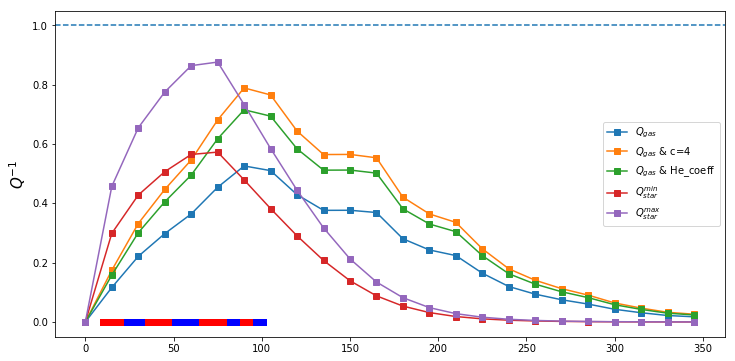

In [82]:
fig = plt.figure(figsize=[12, 6])
gd_data = zip(r_g_dens, gas_dens)

plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$')

plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=4., gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$ & c=4')

plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=He_coeff*l[1]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$ & He_coeff')

plt.plot(r_g_dens, [1./Qs(epicycl=l[0], sigma=l[1], star_density=l[2]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens],
                        map(sig_R_maj_max, r_g_dens), 
                        [surf_density(l_, 5., 'R') for l_ in [mu_disc(ll, mu0=mu0d_R, h=h_disc_R) for ll in r_g_dens]])], 's-', label='$Q_{star}^{min}$')

plt.plot(r_g_dens, [1./Qs(epicycl=l[0], sigma=l[1], star_density=l[2]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens],
                        map(sig_R_maj_min, r_g_dens), 
                        [surf_density(l_, 5., 'R') for l_ in [mu_disc(ll, mu0=mu0d_R, h=h_disc_R) for ll in r_g_dens]])], 's-', label='$Q_{star}^{max}$')

plt.axhline(y=1, ls='--')
plt.legend()
plot_SF(plt.gca())
plt.ylabel('$Q^{-1}$', fontsize=15);

Похоже на диплом.

**НЕ ИСПРАВЛЕНО ЗА 1.6!** И не надо.

Если все домножить на He_coeff, то будут еще два далеких внешних ненаблюдаемых пика, но скорее всего там переоценен молеклярный газ:

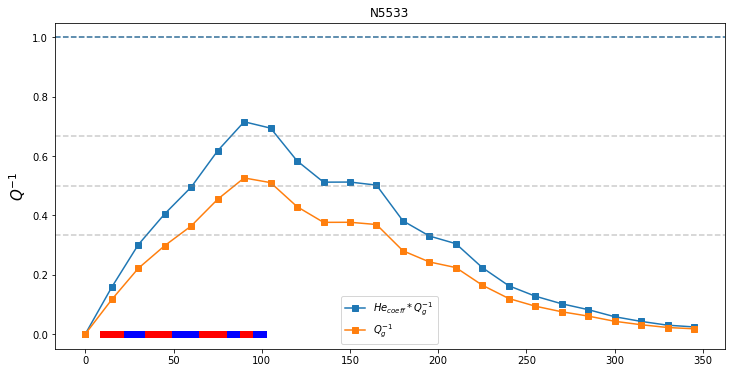

In [83]:
fig = plt.figure(figsize=[12, 6])
gd_data = zip(r_g_dens, gas_dens)

plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=He_coeff*l[1]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$He_{coeff}*Q_{g}^{-1}$')

plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{g}^{-1}$')

plt.axhline(y=1, ls='--')
plt.legend()
plot_SF(plt.gca())
plt.ylabel('$Q^{-1}$', fontsize=15)
plt.title(name)
plot_Q_levels(plt.gca(), [1., 1.5, 2., 3.])
plt.savefig('..\\..\pics\\instab_spirals\\'+name+'_spiral'+'.png', format='png', bbox_inches='tight');

### Двухжидкостная

Кинетическое приближение:
$$\frac{1}{Q_{\mathrm{eff}}}=\frac{2}{Q_{\mathrm{s}}}\frac{1}{\bar{k}}\left[1-e^{-\bar{k}^{2}}I_{0}(\bar{k}^{2})\right]+\frac{2}{Q_{\mathrm{g}}}s\frac{\bar{k}}{1+\bar{k}^{2}s^{2}}>1\,$$

Гидродинамическое приближение:
$$\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{s}}}{\kappa+k^{2}\sigma_{\mathrm{s}}}+\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{g}}}{\kappa+k^{2}c_{\mathrm{g}}}>1$$ или $$\frac{1}{Q_{\mathrm{eff}}}=\frac{2}{Q_{\mathrm{s}}}\frac{\bar{k}}{1+\bar{k}^{2}}+\frac{2}{Q_{\mathrm{g}}}s\frac{\bar{k}}{1+\bar{k}^{2}s^{2}}>1$$ для безразмерного волнового числа ${\displaystyle \bar{k}\equiv\frac{k\,\sigma_{\mathrm{s}}}{\kappa}},\, s=c/\sigma$

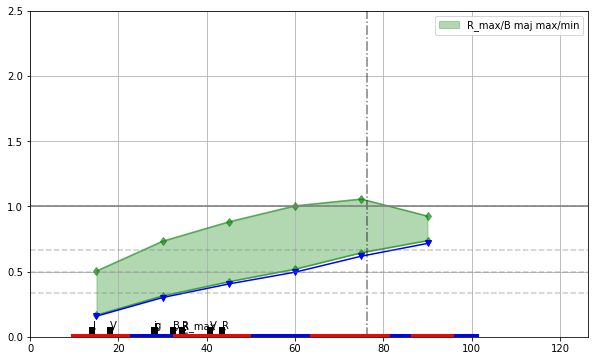

In [84]:
total_gas_data = zip(r_g_dens, map(lambda l: He_coeff*l, gas_dens))[1:7]
disk_scales = [(l[5], l[0].split(' ')[1]) for l in all_photometry]


fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_R, h=h_disc_R), 5., 'R'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_B, h=h_disc_B), M_to_L_B, 'B'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R_max/B maj max/min')

plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid();

Если считать, что молекулярный газ только до двух масштабов диска есть:

**ЭТО НЕВЕРНО! Все равно там исправляется не за молекулярный, а за атомарный гелий**

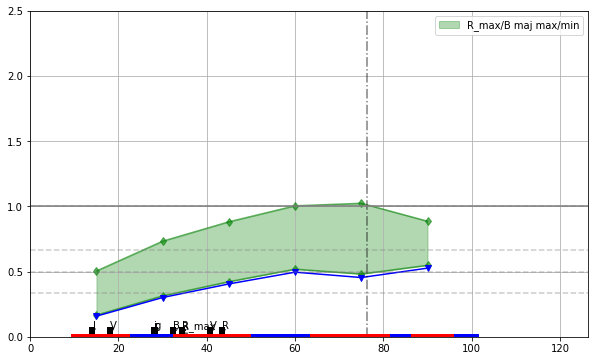

In [85]:
def mol_gas_short(r, m_gas):
    if r < 2*35.:
        return He_coeff*m_gas
    else:
        return m_gas

total_gas_data2 = zip(r_g_dens, [mol_gas_short(l[0], l[1]) for l in zip(r_g_dens, gas_dens)])[1:7]

fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data2, epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_R, h=h_disc_R), 5., 'R'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_B, h=h_disc_B), M_to_L_B, 'B'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R_max/B maj max/min')

plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid();

Что будет если подальше протянуть:

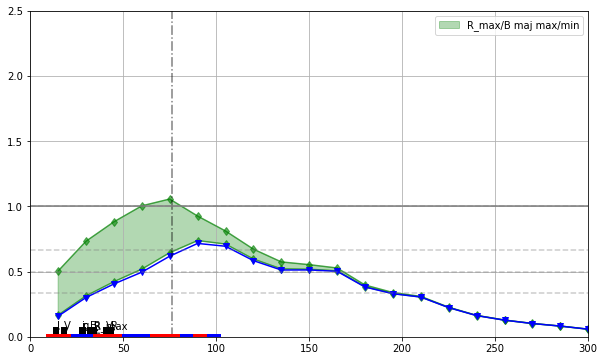

In [86]:
fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, map(lambda l: He_coeff*l, gas_dens))[1:], epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_R, h=h_disc_R), 5., 'R'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_B, h=h_disc_B), M_to_L_B, 'B'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R_max/B maj max/min')

plt.ylim(0., 2.5)
plt.xlim(0., 300.)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid();

Видно, что есть ненаблюдаемые неустойчивости далеко.

# End

In [87]:
# from matplotlib.animation import FuncAnimation

# fig = plt.gcf()
# plt.figure(figsize=(10,6))

# ax = plt.gca()

# def animate(i):
#     ax.cla()
#     plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
#               sigma_max=sig_R_maj_max, 
#               sigma_min=sig_R_maj_min, 
#               star_density_max=all_photometry[i][-1], 
#               star_density_min=all_photometry[i][-1],
#               data_lim=data_lim, color=np.random.rand(3), alpha=0.3, disk_scales=[(all_photometry[i][5], '')])
#     ax.axhline(y=1., ls='-', color='grey')
#     ax.set_title(all_photometry[i][0])
#     ax.set_ylim(0., 2.5)
#     return ax
# anim = FuncAnimation(plt.gcf(), animate, frames=len(all_photometry), interval=1000)

In [88]:
# anim.save('..\\..\pics\\'+name+'.gif', writer='imagemagick', fps=1)

In [89]:
# from IPython.display import HTML
# HTML(anim.to_html5_video())

### Самый максимальный диск

Существует ограничение на максимальный диск в ~0.85 (изотермическое гало) и на субмаксимальный в 0.55-0.6 (NFW гало). Попробуем дотянуть фотметрию до максимальных дисков и посмотрим, как изменятся M/L (скорость зависит как корень из M/L):

Noorder R      : M/L was 2.11 and for max it equal 7.32, for submax equal 3.65
Noorder B      : M/L was 2.52 and for max it equal 8.35, for submax equal 4.16
Noorder R_max  : M/L was 5.00 and for max it equal 7.32, for submax equal 3.65
Mendez-Abreu J : M/L was 1.18 and for max it equal 2.03, for submax equal 1.01
1991 R         : M/L was 2.01 and for max it equal 3.24, for submax equal 1.61
1998 V         : M/L was 2.26 and for max it equal 11.62, for submax equal 5.79
Silchenko V    : M/L was 2.26 and for max it equal 3.92, for submax equal 1.96
califa g (r-i) : M/L was 3.82 and for max it equal 4.53, for submax equal 2.26
califa r (g-i) : M/L was 2.91 and for max it equal 4.51, for submax equal 2.25
califa i (g-r) : M/L was 2.35 and for max it equal 3.90, for submax equal 1.94


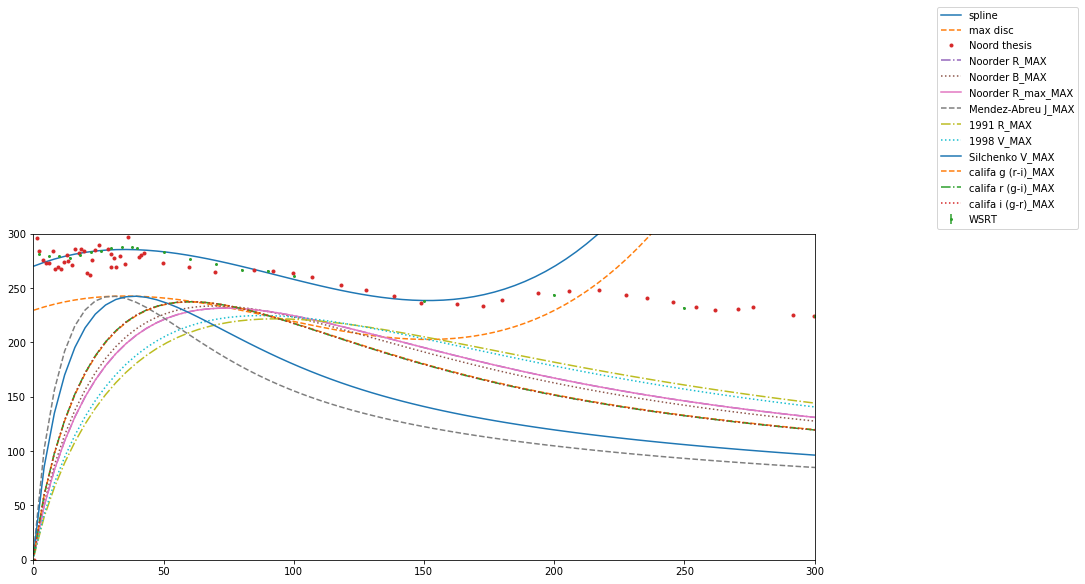

In [90]:
fig = plt.figure(figsize=[14,6])

plt.plot(test_points, spl_gas(test_points), '-', label='spline')
plt.plot(test_points, 0.85*spl_gas(test_points), '--', label='max disc')
# plt.plot(test_points, 0.6*spl_gas(test_points), '--', label='submax disc')
plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'WSRT')
plt.plot(rn, veln, '.', label = 'Noord thesis')

max_coeffs = {}

for photom in all_photometry:
    disc_max = 2.2*photom[5]
    max_coeff = 0.85*spl_gas(disc_max)/disc_vel(disc_max, photom[7](0), photom[5], scale)
    submax_coeff = 0.6*spl_gas(disc_max)/disc_vel(disc_max, photom[7](0), photom[5], scale)
    
    plt.plot(test_points, map(lambda l: disc_vel(l, max_coeff**2 * photom[7](0), photom[5], scale), test_points), next(linecycler), label=photom[0] + '_MAX')
    
    print '{:15s}: M/L was {:2.2f} and for max it equal {:2.2f}, for submax equal {:2.2f}'.format(photom[0], photom[6], photom[6]*max_coeff**2, photom[6]*submax_coeff**2)
    max_coeffs[photom[0]] = [max_coeff**2, submax_coeff**2]


plt.ylim(0, 300)
plt.xlim(0, 300)
plt.legend(bbox_to_anchor=(1.15, 1.0));

По максимумам только Сильченко и Mendez-Abreu похожы. 1998V слишком большое M/L значение. 

In [91]:
# from matplotlib.animation import FuncAnimation

# fig = plt.gcf()
# plt.figure(figsize=(10,6))

# ax = plt.gca()

# def animate(i):
#     ax.cla()
    
#     plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, map(lambda l: He_coeff*l, gas_dens))[1:10],
#               epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
#               sigma_max=sig_R_maj_max, 
#               sigma_min=sig_R_maj_min, 
#               star_density_max=lambda l: max_coeffs[all_photometry[i][0]][0]*all_photometry[i][-1](l), 
#               star_density_min=lambda l: max_coeffs[all_photometry[i][0]][0]*all_photometry[i][-1](l),
#               data_lim=data_lim, color=np.random.rand(3), alpha=0.2, disk_scales=[(all_photometry[i][5], '')])
    
#     plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, map(lambda l: He_coeff*l, gas_dens))[1:10], 
#               epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
#               sigma_max=sig_R_maj_max, 
#               sigma_min=sig_R_maj_min, 
#               star_density_max=lambda l: max_coeffs[all_photometry[i][0]][1]*all_photometry[i][-1](l), 
#               star_density_min=lambda l: max_coeffs[all_photometry[i][0]][1]*all_photometry[i][-1](l),
#               data_lim=data_lim, color=np.random.rand(3), alpha=0.2, disk_scales=[(all_photometry[i][5], '')])
    
#     ax.axhline(y=1., ls='-', color='grey')
#     ax.set_title(all_photometry[i][0])
#     ax.set_ylim(0., 2.5)
#     ax.set_xlim(0., 160.)
#     plot_SF(ax)
#     return ax
# anim = FuncAnimation(plt.gcf(), animate, frames=len(all_photometry), interval=1000)

In [92]:
# anim.save('..\\..\pics\\'+name+'_MAXDISCS.gif', writer='imagemagick', fps=1)

In [93]:
# from IPython.display import HTML
# HTML(anim.to_html5_video())

Есть очень неплохие модели, причем попадающие в максимум Сильченко и Mendez - как и ожидалось очень слабо подтягивают.

### Оценки с молекулярным диском

Берем данные от $0.5R_{25}$ до $2R_{25}$ и пытаемся приблизить наклоном из калибровок или просто экспонентой как в Yim2016 (https://arxiv.org/pdf/1608.06735v1.pdf)

In [94]:
r25 = h_disc_B*(25. - mu0d_Bc)/1.0857
r25, h_disc_B, (25. - mu0d_Bc)/1.0857

(77.88891959104723, 32.4, 2.40397899972368)

[ 33.16108531]


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


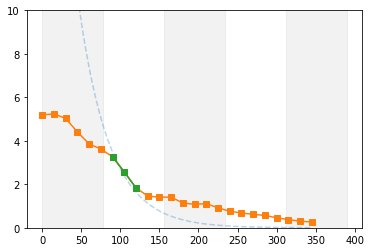

In [95]:
from scipy.optimize import curve_fit

def func1(x, a):
    return a * np.exp(-1.95 * x/r25)

def func2(x, a):
    return a * np.exp(-1.65 * x/r25)

popt, pcov = curve_fit(func1, r_g_dens[6:9], gas_dens[6:9])
print popt
points_ = np.linspace(0., max(r_g_dens), 100.)
plt.plot(points_, func1(points_, *popt), '--', alpha=0.3)

# popt, pcov = curve_fit(func2, r_g_dens[4:16], gas_dens[4:16])
# print popt
# points_ = np.linspace(0., max(r_g_dens), 100.)
# plt.plot(points_, func2(points_, *popt), '--', alpha=0.3)

for i in range(int(max(r_g_dens)/r25)+1):
    if i%2 == 0:
        plt.axvspan(i*r25, (i+1)*r25, color='grey', alpha=0.1)
        
# plt.plot(points_, [21.5*np.exp(-1.65 * l/r25) for l in points_], '-')

plt.plot(r_g_dens, gas_dens, 's-')
plt.plot(r_g_dens[6:9], gas_dens[6:9], 's-')
plt.ylim(0, 10);

Так себе. Попробуем более короткий промежуток, 1.0-1.5 (т.к. видно что хвост у соотношения не точный и тянет вниз).

[ 38.34400115]


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:13: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


[ 24.67098717]


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:19: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


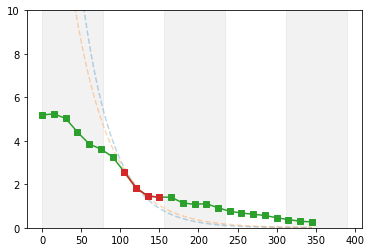

In [96]:
from scipy.optimize import curve_fit

def func1(x, a):
    return a * np.exp(-1.95 * x/r25)

def func2(x, a):
    return a * np.exp(-1.65 * x/r25)

N1 = 7
N2 = 11

popt, pcov = curve_fit(func1, r_g_dens[N1:N2], gas_dens[N1:N2])
points_ = np.linspace(0., max(r_g_dens), 100.)
print popt
plt.plot(points_, func1(points_, *popt), '--', alpha=0.3)

popt, pcov = curve_fit(func2, r_g_dens[N1:N2], gas_dens[N1:N2])
print popt
points_ = np.linspace(0., max(r_g_dens), 100.)
plt.plot(points_, func2(points_, *popt), '--', alpha=0.3)

for i in range(int(max(r_g_dens)/r25)+1):
    if i%2 == 0:
        plt.axvspan(i*r25, (i+1)*r25, color='grey', alpha=0.1)

plt.plot(r_g_dens, gas_dens, 's-')
plt.plot(r_g_dens[N1:N2], gas_dens[N1:N2], 's-')
plt.ylim(0, 10);

Вот тут хорошо и здорово, будем считать что суммарный профиль газа описывается экпонентой и тогда центральные значения это молекулярный + атомарный.

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:18: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


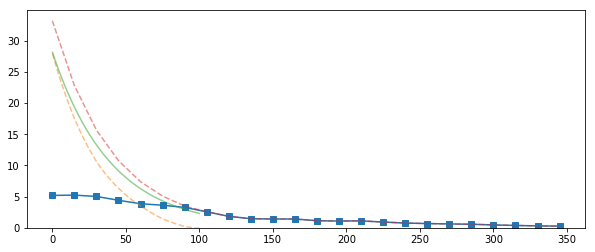

In [97]:
import scipy.interpolate

fig = plt.figure(figsize=[10, 4])

def y_interp_(r, h):
    HId = scipy.interpolate.interp1d(r_g_dens, gas_dens)
    if r < 100:
        return (33.2 * np.exp(-1.95 * r/r25)-HId(r))
    else:
        return 0.

# def y_interp_(r, h):
#     return (17.0-gas_dens[0])*np.exp(-r/h)

# def y_interp_2(r, h):
#     return (25.0-gas_dens[0])*np.exp(-r/h)

points = np.linspace(0.1, 100., 100.)

plt.plot(r_g_dens, gas_dens, 's-')

plt.plot(points, map(lambda l: y_interp_(l, 24.), points),  '--', alpha=0.5)
plt.plot(points, map(lambda l: 28.2 * np.exp(-1.95 * l/r25), points),  '-', alpha=0.5)
plt.plot(r_g_dens, map(lambda l: y_interp_(l[0], 24.) + l[1], zip(r_g_dens, gas_dens)),  '--', alpha=0.5)

plt.ylim(0.);

# plt.plot(points, y_interp_2(points, 24.),  '--', alpha=0.5)
# plt.plot(r_g_dens, map(lambda l: y_interp_2(l[0], 24.) + l[1], zip(r_g_dens, gas_dens)),  '--', alpha=0.5);

In [98]:
import scipy.integrate as integrate
import scipy.interpolate

points = np.linspace(0.1, 100., 100.)
tmp_ = scipy.interpolate.interp1d(points, [y_interp_(l, -1.) for l in points])

result = integrate.quad(lambda l: 2*np.pi*l*tmp_(l), points[0], points[-1])
print (scale * 1000.)**2 * result[0]/1e9

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


8.11408451369


C:\Anaconda\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [99]:
(1 - 0.287) * 2*math.pi* (r25/1.95*scale * 1000.)**2 * 33.2/1e9

16.41349682946259

In [100]:
points = np.linspace(0.1, 100., 100.)
HId = scipy.interpolate.interp1d(r_g_dens, gas_dens)
tmp_ = scipy.interpolate.interp1d(points, [HId(l) for l in points])

result = integrate.quad(lambda l: 2*np.pi*l*tmp_(l), points[0], points[-1])
print (scale * 1000.)**2 * result[0]/1e9

8.31211873004


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


In [101]:
16.41 - 8.31

8.1

Все сошлось.

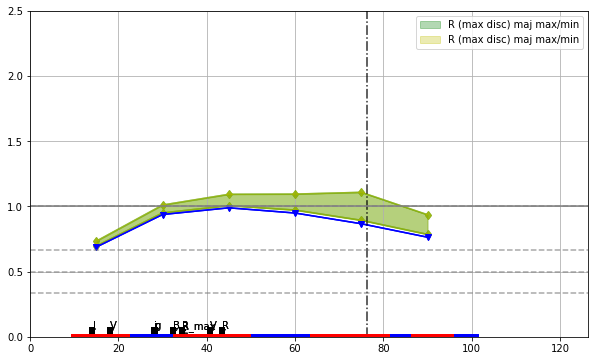

In [102]:
fig = plt.figure(figsize=[10, 6])

total_gas_data_ = zip(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[:7]

ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data_[1:], epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_R, h=h_disc_R), 5., 'R'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_B, h=h_disc_B), M_to_L_B, 'B'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R (max disc) maj max/min')

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data_[1:], epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_R, h=h_disc_R), 5., 'R'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_B, h=h_disc_B), M_to_L_B, 'B'), 
              data_lim=data_lim, color='y', alpha=0.3, disk_scales=disk_scales, label='R (max disc) maj max/min')

plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid();

Остальные фотометрии: 

In [103]:
# from matplotlib.animation import FuncAnimation

# fig = plt.gcf()
# plt.figure(figsize=(10,6))

# ax = plt.gca()

# def animate(i):
#     ax.cla()
#     total_gas_data_ = zip(r_g_dens, [He_coeff*(y_interp_(l[0], all_photometry[i][-3]) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:7]
#     plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data_[1:], epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
#               sigma_max=sig_R_maj_max, 
#               sigma_min=sig_R_maj_min, 
#               star_density_max=all_photometry[i][-1], 
#               star_density_min=all_photometry[i][-1],
#               data_lim=data_lim, color=np.random.rand(3), alpha=0.3, disk_scales=[(all_photometry[i][5], '')])
    
#     total_gas_data_2 = zip(r_g_dens, [He_coeff*(y_interp_2(l[0], all_photometry[i][-3]) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:7]
#     plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data_2[1:], epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
#               sigma_max=sig_R_maj_max, 
#               sigma_min=sig_R_maj_min, 
#               star_density_max=all_photometry[i][-1], 
#               star_density_min=all_photometry[i][-1],
#               data_lim=data_lim, color=np.random.rand(3), alpha=0.3, disk_scales=[(all_photometry[i][5], '')])
#     ax.axhline(y=1., ls='-', color='grey')
#     ax.set_title(all_photometry[i][0])
#     ax.set_ylim(0., 2.5)
#     return ax
# anim = FuncAnimation(plt.gcf(), animate, frames=len(all_photometry), interval=1000)

In [104]:
# anim.save('..\\..\pics\\'+name+'_molec.gif', writer='imagemagick', fps=1)

In [105]:
# from IPython.display import HTML
# HTML(anim.to_html5_video())

И оценки с максимальным диском:

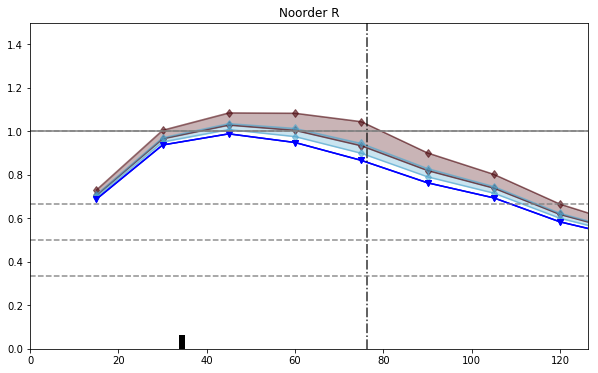

In [106]:
from matplotlib.animation import FuncAnimation

fig = plt.gcf()
plt.figure(figsize=(10,6))

ax = plt.gca()

def animate(i):
    ax.cla()
    if type(all_photometry[i][5]) == tuple:
        total_gas_data_ = zip(r_g_dens, [He_coeff*(y_interp_(l[0], all_photometry[i][-3][0]) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:10]
    else:
        total_gas_data_ = zip(r_g_dens, [He_coeff*(y_interp_(l[0], all_photometry[i][-3]) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:10]
        
       
    plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data_, epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: max_coeffs[all_photometry[i][0]][0]*tot_dens(all_photometry[i][-1])(l), 
              star_density_min=lambda l: max_coeffs[all_photometry[i][0]][0]*tot_dens(all_photometry[i][-1])(l),
              data_lim=data_lim, color=np.random.rand(3), alpha=0.3, disk_scales=[(all_photometry[i][5], '')])
    
    
    plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data_, epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: max_coeffs[all_photometry[i][0]][1]*tot_dens(all_photometry[i][-1])(l), 
              star_density_min=lambda l: max_coeffs[all_photometry[i][0]][1]*tot_dens(all_photometry[i][-1])(l),
              data_lim=data_lim, color=np.random.rand(3), alpha=0.3, disk_scales=[(all_photometry[i][5], '')])
    
    ax.axhline(y=1., ls='-', color='grey')
    ax.set_title(all_photometry[i][0])
    ax.set_ylim(0., 1.5)
    plot_Q_levels(ax, [1., 1.5, 2., 3.])
    return ax
anim = FuncAnimation(plt.gcf(), animate, frames=len(all_photometry), interval=1000)

In [107]:
# anim.save('..\\..\pics\\'+name+'_molec_MAX.gif', writer='imagemagick', fps=1)

In [108]:
# from IPython.display import HTML
# HTML(anim.to_html5_video())

### Картинка 

In [110]:
os.getcwd()

'C:\\science\\2FInstability\\data\\ngc5533'

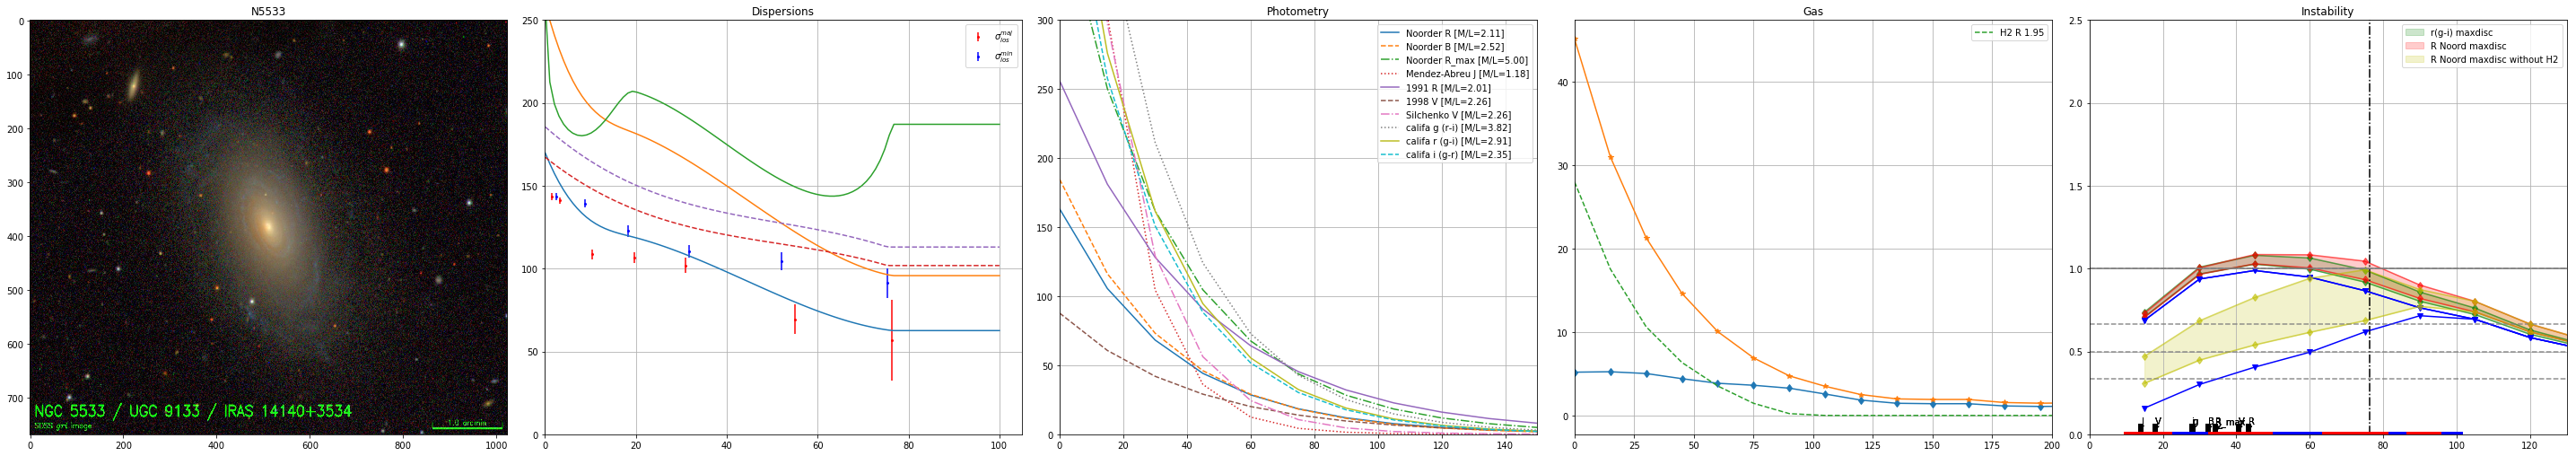

In [111]:
summary_imgs_path = '..\\..\pics\\notebook_summary\\'

def save_model_plot(path):
    fig, axes = plt.subplots(1, 5, figsize=[40,7])
    fig.tight_layout()
    
    axes[0].imshow(ImagePIL.open('ngc5533_SDSS_labeled.jpeg'), aspect='auto')
    axes[0].set_title(name)
    
    try:
        axes[1].errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$')
        axes[1].plot(points, map(sig_R_maj_min, points))
        axes[1].plot(points, map(sig_R_maj_max, points))
        axes[1].plot(points, map(sig_R_maj_maxmaxtrue, points))
    except Exception:
        pass
    
    try:
        axes[1].errorbar(r_sig_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='b', label='$\sigma_{los}^{min}$')
        axes[1].plot(points, map(sig_R_minor_min, points), '--')
        axes[1].plot(points, map(sig_R_minor_max, points), '--')
    except Exception:
        pass

    axes[1].set_ylim(0,250)
    axes[1].set_xlim(0, 105)  
    axes[1].grid()
    axes[1].legend()
    axes[1].set_title('Dispersions')
    
    for photom in all_photometry:
        axes[2].plot(r_g_dens, map(photom[-1], r_g_dens), next(linecycler), label='{} [M/L={:2.2f}]'.format(photom[0], photom[-2]))
    axes[2].set_xlim(0, 150)
    axes[2].set_ylim(0, 300)
    axes[2].set_title('Photometry')
    axes[2].grid()
    axes[2].legend()
    
    axes[3].plot(r_g_dens, gas_dens, 'd-')
    axes[3].plot(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)], '*-')
#     axes[3].plot(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)], '*-')
    axes[3].plot(r_g_dens, [y_interp_(l, h_disc_R) for l in r_g_dens], '--', label='H2 R 1.95')
#     axes[3].plot(r_g_dens, [y_interp_2(l, h_disc_R) for l in r_g_dens], '--', label='H2 R 1.65')
    axes[3].set_title('Gas')
    axes[3].grid()
    axes[3].set_xlim(0, 200)
    axes[3].legend()
    
    #change this
    total_gas_data_ = zip(r_g_dens, [He_coeff*(y_interp_(l[0], hi_r) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:10]

    @save_model(models_path+'n5533_modelr.npy')
    def plot_2f_vs_1f_(*args, **kwargs):
        plot_2f_vs_1f(*args, **kwargs)
    plot_2f_vs_1f_(ax=axes[4], total_gas_data=total_gas_data_, 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=4.51, band='r'), 
                  star_density_min=lambda l: surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=4.51, band='r'), 
                  data_lim=data_lim, color='g', alpha=0.2, disk_scales=disk_scales, label='r(g-i) maxdisc',
                  ML=4.51,
                  CO = lambda l: y_interp_(l, 0.))
    
    @save_model(models_path+'n5533_modelRmax.npy')
    def plot_2f_vs_1f_(*args, **kwargs):
        plot_2f_vs_1f(*args, **kwargs)
    plot_2f_vs_1f_(ax=axes[4], total_gas_data=total_gas_data_, 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=7.32, band='R'), 
                  star_density_min=lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=7.32, band='R'), 
                  data_lim=data_lim, color='r', alpha=0.2, disk_scales=disk_scales, label='R Noord maxdisc',
                  ML=7.32,
                  CO = lambda l: y_interp_(l, 0.))
    
    @save_model(models_path+'n5533_modelRzeroH2.npy')
    def plot_2f_vs_1f_(*args, **kwargs):
        plot_2f_vs_1f(*args, **kwargs)
    plot_2f_vs_1f_(ax=axes[4], total_gas_data=zip(r_g_dens, [He_coeff*(0. + l[1]) for l in zip(r_g_dens, gas_dens)])[1:10], 
              epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, 
              sound_vel=sound_vel, 
              scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=7.32, band='R'), 
              star_density_min=lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=7.32, band='R'), 
              data_lim=data_lim, color='y', alpha=0.2, disk_scales=disk_scales, label='R Noord maxdisc without H2',
              ML=7.32,
              CO = lambda l: 0.01)

    axes[4].set_ylim(0., 2.5)
    axes[4].set_xlim(0., 130.)
    axes[4].axhline(y=1., ls='-', color='grey')
    plot_SF(axes[4])
    axes[4].grid()
    axes[4].set_title('Instability');
       
    plt.savefig(path+name+'.png', format='png', bbox_inches='tight');
    
save_model_plot(summary_imgs_path)

### Другие механизмы

Schaye (2004), 'cold gas phase':
$$\Sigma_g > 6.1 f_g^{0.3} Z^{-0.3} I^{0.23}$$
или при constant metallicity of 0.1 $Z_{sun}$ and interstellar flux of ionizing photons 10^6 cm−2 s−1:
$$\Sigma_g > 6.1 \frac{\Sigma_g}{\Sigma_g + \Sigma_s}$$

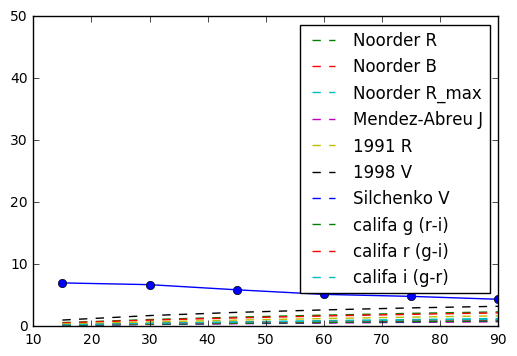

In [106]:
plt.plot(zip(*total_gas_data)[0], zip(*total_gas_data)[1], 'o-')

for photom in all_photometry:
    dens_s04 = [Sigma_crit_S04(l[0], l[1], photom[7]) for l in total_gas_data]
    plt.plot(zip(*total_gas_data)[0], dens_s04, '--', label=photom[0])

plt.legend()
plt.ylim(0, 50.);

Видимо везде неустойчиво.

Hunter et al (1998), 'competition with shear' according to Leroy: 
$$\Sigma_A = \alpha_A\frac{\sigma_g A}{\pi G}$$

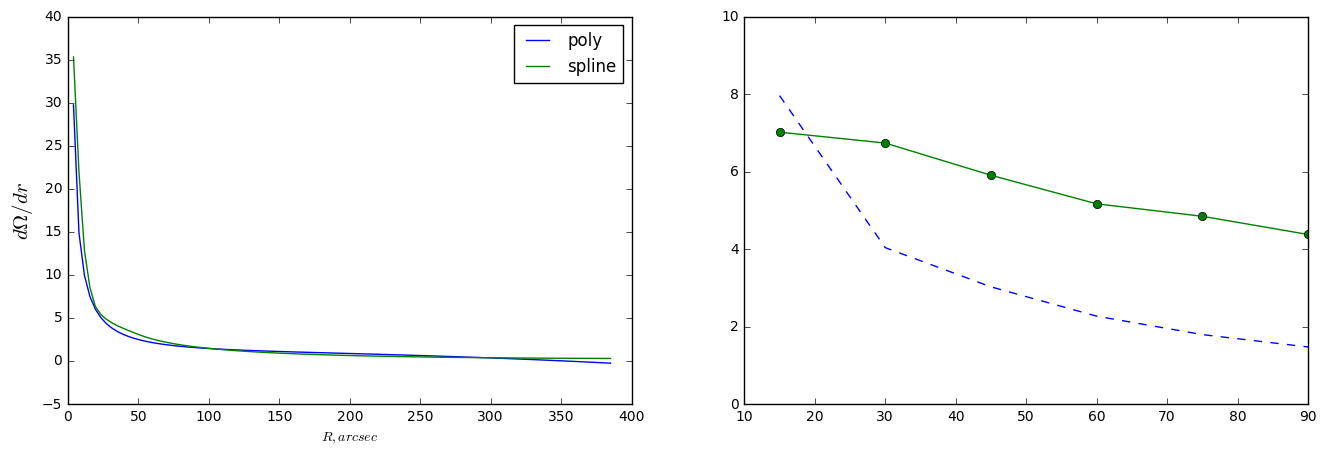

In [107]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=[16, 5])
ax1.plot(test_points, [oort_a(x, gas_approx) for x in test_points], '-', label='poly')
ax1.plot(test_points, [oort_a(x, spl_gas) for x in test_points], '-', label='spline')
ax1.set_xlabel('$R, arcsec$')
ax1.set_ylabel('$d\Omega/dr$', fontsize=15)
ax1.legend()

dens_A = [Sigma_crit_A(l, spl_gas, 2., 6.) for l in zip(*total_gas_data)[0]]
ax2.plot(zip(*total_gas_data)[0], dens_A, '--')
ax2.plot(zip(*total_gas_data)[0], zip(*total_gas_data)[1], 'o-')
ax2.set_ylim(0, 10.);

Непонятно, похоже тоже везде неустойчиво за исключением самого центра.

### Дисперсии из АD

Интересный вариант для тех галактик, в которых есть данные по газу. Разница между скоростями вращения звезд и газа вокруг центра галактики называется ассиметричным сдвигом и описывается следующим уравнением (Binney & Tremaine 1987): $$v_{\mathrm{c}}^{2}-\bar{v}_{\varphi}^{2}=\sigma_{R}^{2}\left(\frac{\sigma_{\varphi}^{2}}{\sigma_{R}^{2}}-1-\frac{\partial\ln\Sigma_{\mathrm{s}}}{\partial\ln R}-\frac{\partial\ln\sigma_{R}^{2}}{\partial\ln R}\right)\,$$
Отношение ${\displaystyle \frac{\sigma_{\varphi}^{2}}{\sigma_{R}^{2}}}$ знаем из соответствующего уравнения. Поймем, как в этом выражении вычисляется логарифмическая производная ${\displaystyle \frac{\partial\ln\Sigma_{\mathrm{s}}}{\partial\ln R}}$. Если отношение массы к светимости принять постоянной вдоль радиуса величиной, то в производной ${\displaystyle \frac{\partial\ln\Sigma_{\mathrm{s}}}{\partial\ln R}}$ можно использовать поверхностную яркость звездного диска вместо поверхностной плотности $\Sigma_{\mathrm{s}}$ в тех полосах, которые трассируют старое звездное население. Это означает, что логарифмическая производная должна быть заменена отношением $-{\displaystyle \frac{R}{h_{\text{d}}}}\,,$ где $h_{\text{d}}$ --- экспоненциальный масштаб диска.
Вычисление $\frac{\partial\ln\sigma_{R}^{2}}{\partial\ln R}$ из кинематического масштаба равно $-\frac{2R}{h_{kin}}$

In [108]:
def sigR2Evaluation(R, h, h_kin, p_star, p_gas):
    '''Вычисление sigmaR^2 в случае, если уже известен кинетический масштаб.'''
    return (p_gas(R) ** 2 - p_star(R) ** 2 ) / ( sigPhi_to_sigR_real(R) - 1 + R / h + R / h_kin )

def asymmetricDriftEvaluation(r_pc, h, path, p_star, p_gas, upperLimit):
    '''Вычисление ассиметричного сдвига на основе формулы (21) из методички. Логарифмическая производная от радиальной
     дисперсии скоростей считается как предложено в статье Silchenko et al. 2011, экспонентой фитируется для R > 1h.
     Сами значения считаются только для тех точек, есть данные и по газу и по звездам.'''
    eps = 0.1
    h_kin = 0
    h_kin_next = h
    sigR2 = []
    upper = upperLimit
    r_gt_1h = filter(lambda x: x > h and x <= upper, r_pc)
    expfit = poly1d(1)

    h_disc = h

    print '#!!!!!!!!!!!!# Asymmetric drift evaluation procedure with eps = ' + str(eps) + ' starts.'
    while(abs(h_kin - h_kin_next) > eps):
        h_kin = h_kin_next
        sigR2[:] = []
        for R in r_gt_1h:
            sigR2.append((p_gas(R) ** 2 - p_star(R) ** 2 ) / ( sigPhi_to_sigR_real(R) - 1 + R / h + R / h_kin ))
        sigR2 = map(math.log, sigR2)
        expfit = poly1d(polyfit(r_gt_1h, sigR2, deg=1))
        h_kin_next = (-1 / expfit.coeffs[0])
        print '#!!!!!!!!!!!!# Next approx h_kin =', h_kin_next

    h_kin = h_kin_next
    sigR2[:] = []
    for R in r_pc:
        sigR2.append((p_gas(R) ** 2 - p_star(R) ** 2 ) / ( sigPhi_to_sigR_real(R) - 1 + R / h + R / h_kin ))

    sigR20 = math.exp(expfit.coeffs[1])
#     rexp_sigR2 = evalStartExp(r_pc, sigR2, lambda x: sigR20 * math.exp(-x / h_kin))
    return sigR20, h_kin, [sigR2Evaluation(R, h, h_kin, p_star, p_gas) for R in r_pc]

sigR20, h_kin, sigR2 = asymmetricDriftEvaluation(r_sig_ma, 30., '', star_approx, spl_gas, sig_maj_lim)

#!!!!!!!!!!!!# Asymmetric drift evaluation procedure with eps = 0.1 starts.
#!!!!!!!!!!!!# Next approx h_kin = 57.3628456073
#!!!!!!!!!!!!# Next approx h_kin = 52.8360081267
#!!!!!!!!!!!!# Next approx h_kin = 53.3864050279
#!!!!!!!!!!!!# Next approx h_kin = 53.3164182903


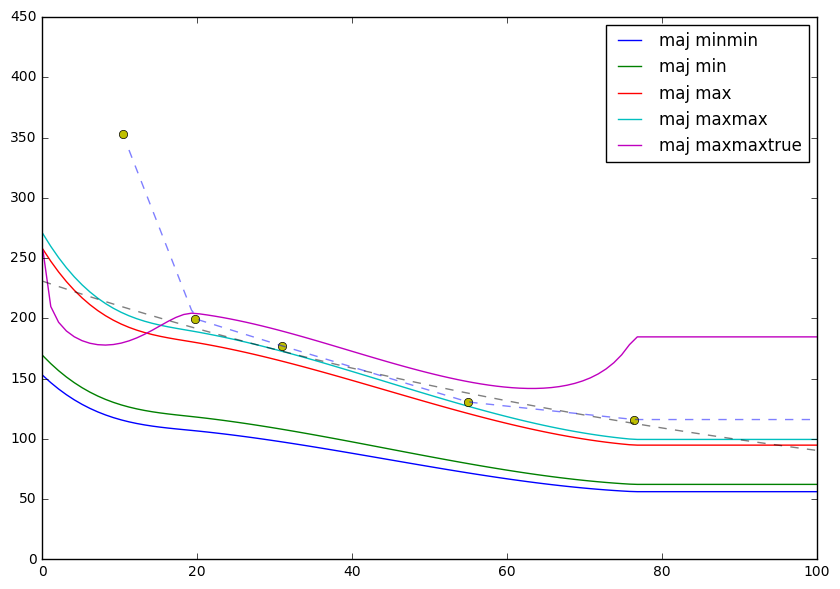

In [109]:
import scipy.interpolate
fig = plt.figure(figsize=[10, 7])

plt.plot(points, map(sig_R_maj_minmin, points), label = 'maj minmin')
plt.plot(points, map(sig_R_maj_min, points), label = 'maj min')
plt.plot(points, map(sig_R_maj_max, points), label = 'maj max')
plt.plot(points, map(sig_R_maj_maxmax, points), label = 'maj maxmax')
plt.plot(points, map(sig_R_maj_maxmaxtrue, points), label = 'maj maxmaxtrue')

plt.plot(r_sig_ma, np.sqrt(sigR2), 'o')
plt.plot(points, map(lambda l: np.sqrt(sigR20 * math.exp(-l / h_kin)), points),  '--', alpha=0.5)

ad_interp = scipy.interpolate.interp1d(r_sig_ma, np.sqrt(sigR2))

@flat_end(sig_maj_lim)
def ad_interp_(r):
    return ad_interp(r)

plt.plot(points[2:], map(ad_interp_, points[2:]),  '--', alpha=0.5)

plt.legend()
plt.ylim(0,450)
plt.xlim(0,100);

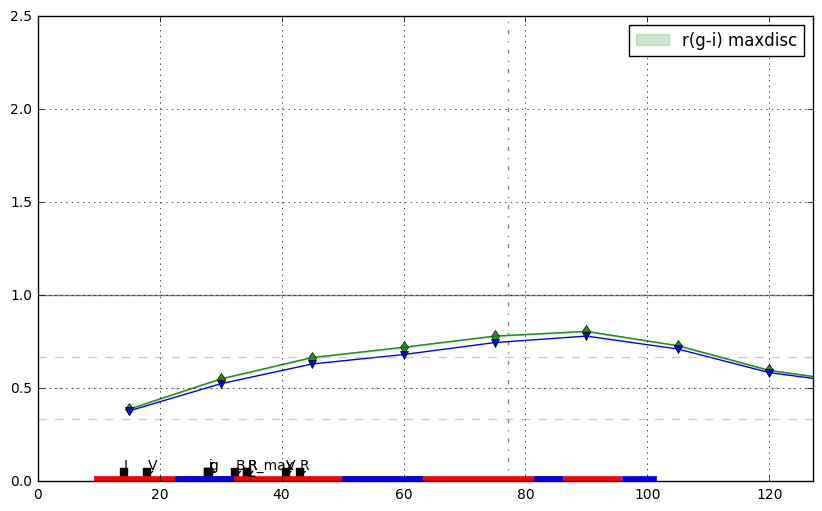

In [110]:
fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], hi_r) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:10], 
              epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, 
              sound_vel=sound_vel, 
              scale=scale, 
              sigma_max=ad_interp_, 
              sigma_min=ad_interp_, 
              star_density_max=lambda l: surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=4.41, band='r'), 
              star_density_min=lambda l: surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=4.41, band='r'), 
              data_lim=data_lim, color='g', alpha=0.2, disk_scales=disk_scales, label='r(g-i) maxdisc')

plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid();

Не сильно отличается, что вообще-то ожидаемо.

Если брать экспонентой:

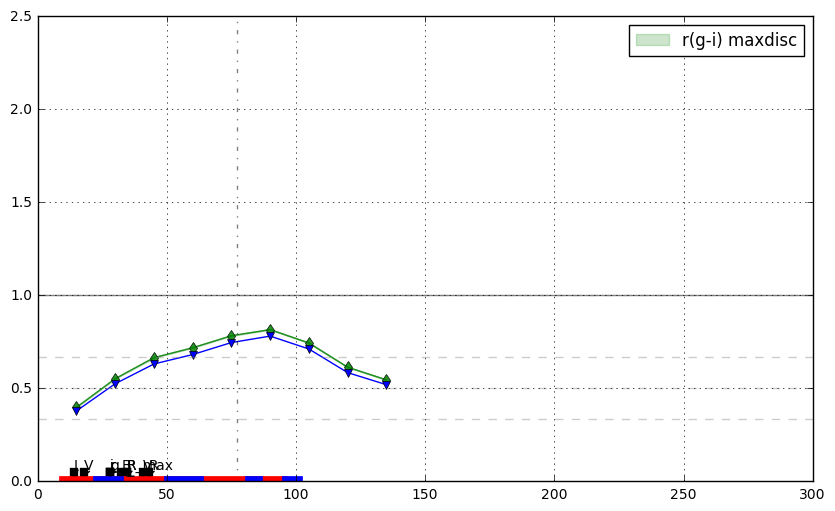

In [111]:
fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], hi_r) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:10], 
              epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, 
              sound_vel=sound_vel, 
              scale=scale, 
              sigma_max=lambda l: np.sqrt(sigR20 * math.exp(-l / h_kin)), 
              sigma_min=lambda l: np.sqrt(sigR20 * math.exp(-l / h_kin)), 
              star_density_max=lambda l: surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=4.41, band='r'), 
              star_density_min=lambda l: surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=4.41, band='r'), 
              data_lim=data_lim, color='g', alpha=0.2, disk_scales=disk_scales, label='r(g-i) maxdisc')

plt.xlim(0., 300.)
plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid();

Ничего особо не поменялось.

### Экспоненциальные оценки H2

В работах van der Hulst (2016) и Bigiel, Blitz (2012) есть экспоненциальные соотношения для H2+HI (см. заметки). 

Можно попробовать использовать это для оценки молекулярной компоненты газа:

In [112]:
r25 = h_disc_B*(25. - mu0d_B)/1.0857
r25, h_disc_B, (25. - mu0d_B)/1.0857

(91.61646863774523, 32.4, 2.8276687851155935)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:14: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


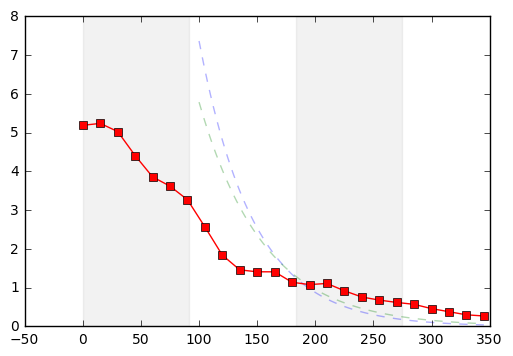

In [113]:
from scipy.optimize import curve_fit

def func1(x, a):
    return a * np.exp(-1.95 * x/r25)

def func2(x, a):
    return a * np.exp(-1.65 * x/r25)

popt, pcov = curve_fit(func1, r_g_dens[11:], gas_dens[11:])
points_ = np.linspace(100., max(r_g_dens), 100.)
plt.plot(points_, func1(points_, *popt), '--', alpha=0.3)

popt, pcov = curve_fit(func2, r_g_dens[11:], gas_dens[11:])
points_ = np.linspace(100., max(r_g_dens), 100.)
plt.plot(points_, func2(points_, *popt), '--', alpha=0.3)

for i in range(int(max(r_g_dens)/r25)+1):
    if i%2 == 0:
        plt.axvspan(i*r25, (i+1)*r25, color='grey', alpha=0.1)

plt.plot(r_g_dens, gas_dens, 's-');

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


0.752865444663


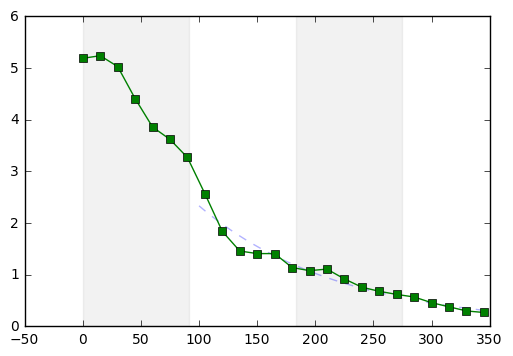

In [114]:
def func(x, a, b):
    return a * np.exp(-b * x/r25)

popt, pcov = curve_fit(func, r_g_dens[7:], gas_dens[7:])
print popt[1]
points_ = np.linspace(100., max(r_g_dens), 100.)
plt.plot(points_, func(points_, *popt), '--', alpha=0.3)

for i in range(int(max(r_g_dens)/r25)+1):
    if i%2 == 0:
        plt.axvspan(i*r25, (i+1)*r25, color='grey', alpha=0.1)

plt.plot(r_g_dens, gas_dens, 's-');

0.880529460795
0.895456842948
0.914036744088
0.869231722305
0.752865444663
0.659347326684
0.648095689118
0.69877270457
0.74600159211
0.744470113642
0.820760599012
0.910176623879
0.876237085742
0.868648790266
0.943448621817
1.06502006297


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


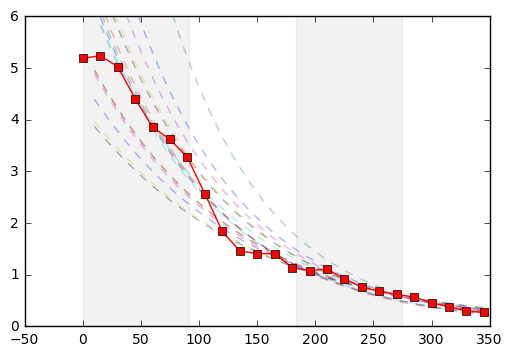

In [115]:
def func(x, a, b):
    return a * np.exp(-b * x/r25)

for i in range(3, len(r_g_dens)-5):
    popt, pcov = curve_fit(func, r_g_dens[i:], gas_dens[i:])
    print popt[1]
    points_ = np.linspace(10., max(r_g_dens), 100.)
    plt.plot(points_, func(points_, *popt), '--', alpha=0.3)

for i in range(int(max(r_g_dens)/r25)+1):
    if i%2 == 0:
        plt.axvspan(i*r25, (i+1)*r25, color='grey', alpha=0.1)

plt.plot(r_g_dens, gas_dens, 's-')
plt.ylim(0, 6.);

1.08110684528


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


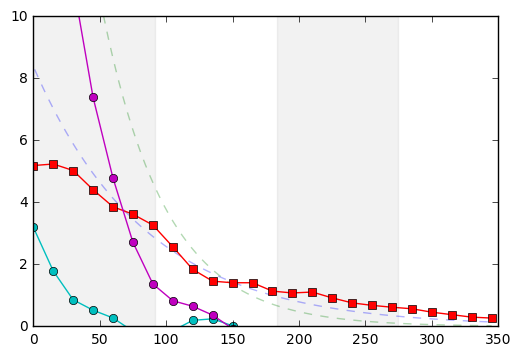

In [116]:
def func(x, a, b):
    return a * np.exp(-b * x/r25)

tmp_1, tmp_2 = zip(*filter(lambda l: l[0] < 1.5*r25 and l[0] > 0.5*r25, zip(r_g_dens, gas_dens)))
popt, pcov = curve_fit(func, tmp_1, tmp_2)
print popt[1]
points_ = np.linspace(1., max(r_g_dens), 100.)
plt.plot(points_, func(points_, *popt), '--', alpha=0.3)

plt.plot(points_, func(points_, 30., 1.9), '--', alpha=0.3)

for i in range(int(max(r_g_dens)/r25)+1):
    if i%2 == 0:
        plt.axvspan(i*r25, (i+1)*r25, color='grey', alpha=0.1)

plt.plot(r_g_dens, gas_dens, 's-')

plt.plot(r_g_dens, map(lambda l: func(l[0], *popt)-l[1], zip(r_g_dens, gas_dens)), 'o-')
plt.plot(r_g_dens, map(lambda l: func(l[0], 30., 1.9)-l[1], zip(r_g_dens, gas_dens)), 'o-')

plt.xlim(0)
plt.ylim(0, 10);

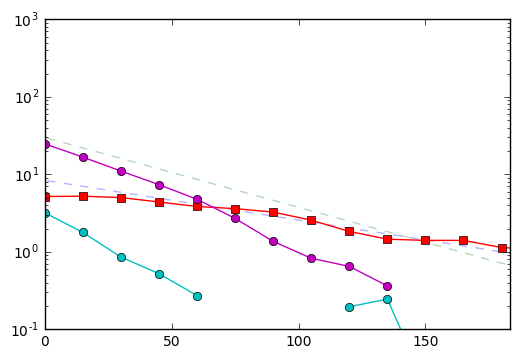

In [117]:

plt.semilogy(points_, func(points_, *popt), '--', alpha=0.3)

plt.semilogy(points_, func(points_, 30., 1.9), '--', alpha=0.3)

# for i in range(int(max(r_g_dens)/r25)+1):
#     if i%2 == 0:
#         plt.axvspan(i*r25, (i+1)*r25, color='grey', alpha=0.1)

plt.semilogy(r_g_dens, gas_dens, 's-')

plt.semilogy(r_g_dens, map(lambda l: func(l[0], *popt)-l[1], zip(r_g_dens, gas_dens)), 'o-')
plt.semilogy(r_g_dens, map(lambda l: func(l[0], 30., 1.9)-l[1], zip(r_g_dens, gas_dens)), 'o-')

plt.xlim(0, 2*r25)
plt.ylim(0.1, 1000);

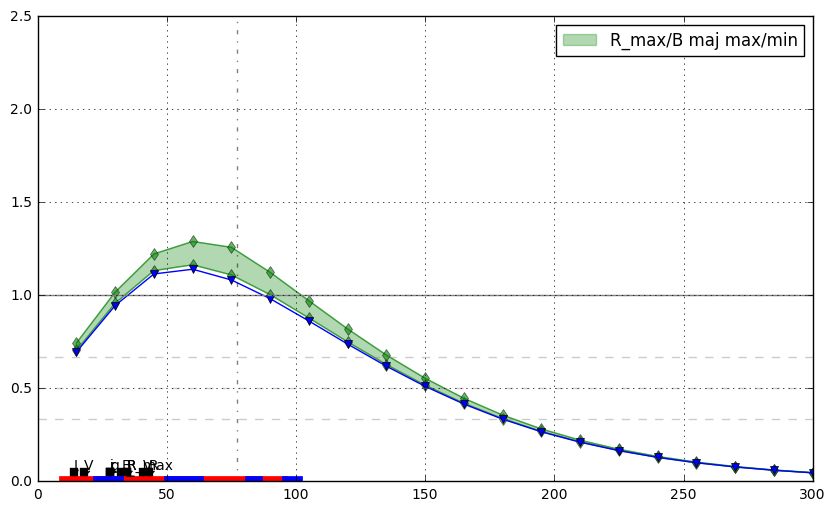

In [118]:
fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, map(lambda l: 1.36*func(l, 30., 1.9), r_g_dens))[1:], epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_R, h=h_disc_R), 5., 'R'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_B, h=h_disc_B), M_to_L_B, 'B'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R_max/B maj max/min')

plt.ylim(0., 2.5)
plt.xlim(0., 300.)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid();

### Сравнение с Romeo Falstad 2013

Тут учитывается толщина диска:

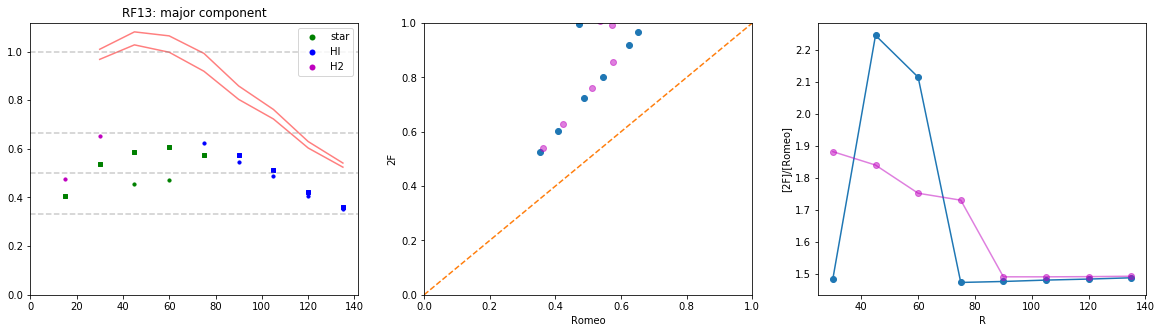

In [269]:
plot_RF13_vs_2F(r_g_dens=r_g_dens[1:10], HI_gas_dens=gas_dens[1:10], CO_gas_dens=[y_interp_(l, hi_r) for l in r_g_dens[1:10]], 
                epicycl=epicyclicFreq_real, sound_vel=sound_vel, sigma_R_max=sig_R_maj_max, sigma_R_min=sig_R_maj_min,  
                star_density=lambda l: surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=4.51, band='r'), 
                alpha_max=0.7, alpha_min=0.3, scale=scale, gas_approx=spl_gas, thin=False)

А тут нет:

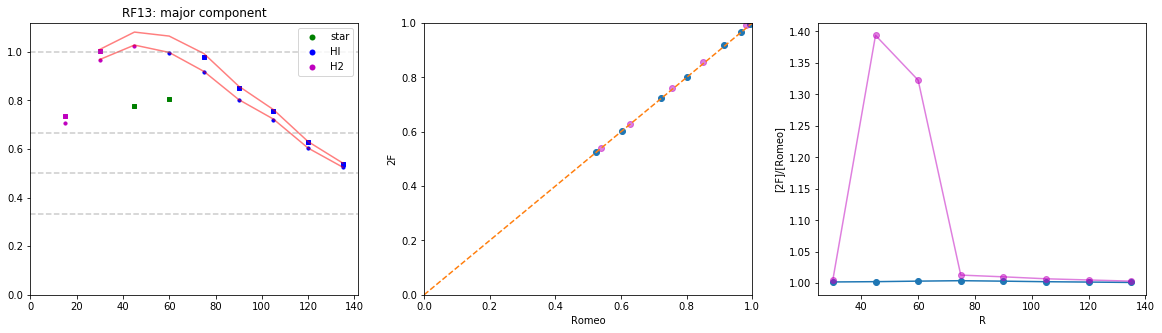

In [270]:
plot_RF13_vs_2F(r_g_dens=r_g_dens[1:10], HI_gas_dens=gas_dens[1:10], CO_gas_dens=[y_interp_(l, hi_r) for l in r_g_dens[1:10]], 
                epicycl=epicyclicFreq_real, sound_vel=sound_vel, sigma_R_max=sig_R_maj_max, sigma_R_min=sig_R_maj_min,  
                star_density=lambda l: surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=4.51, band='r'), 
                alpha_max=0.7, alpha_min=0.3, scale=scale, gas_approx=spl_gas, thin=True)
plt.savefig('..\\..\pics\\RF13\\'+name+'.png', format='png', bbox_inches='tight');

Видно, что согласие достаточно хорошее.

### Реалистичные дисперсии

133.709127752


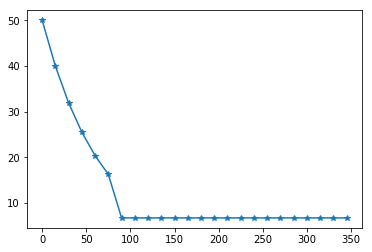

In [284]:
r25_ = h_disc_R*(25. - mu0d_R)/1.0857
print r25_
plt.plot(r_g_dens, [50*np.exp(-2*l/r25_) if l < r25 else 50*np.exp(-2.) for l in r_g_dens], '*-');

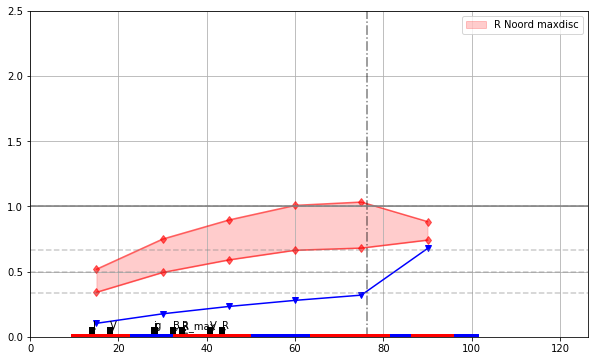

In [285]:
fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data_[1:8], 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=spl_gas, 
                  sound_vel=[50*np.exp(-2*l/r25_) if l < r25 else 50*np.exp(-2.) for l in r_g_dens[1:8]], 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=7.32, band='R'), 
                  star_density_min=lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=7.32, band='R'), 
                  data_lim=data_lim, color='r', alpha=0.2, disk_scales=disk_scales, label='R Noord maxdisc')

plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid();

### Влияние параметров на результат

Влияние скорости звука:

Wall time: 4min 39s


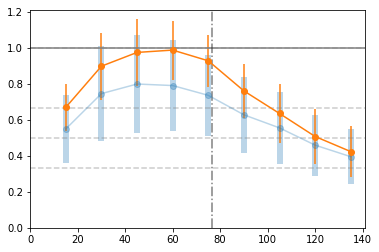

In [286]:
%%time

plot_param_depend(ax=plt.gca(), data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='r maxdisc', N = 20,
                  total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], hi_r) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:10], 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=spl_gas, 
                  sound_vel=list(np.linspace(4., 15., 20)), 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=4.51, band='r'), 
                  star_density_min=lambda l: surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=4.51, band='r'))

plt.savefig('..\\..\pics\\cg\\'+name+'.png', format='png', bbox_inches='tight');

Влияние убирания молек. газа:

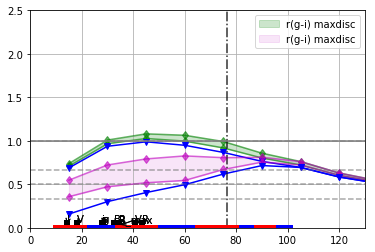

In [287]:
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], hi_r) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:10], 
              epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, 
              sound_vel=sound_vel, 
              scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=4.51, band='r'), 
              star_density_min=lambda l: surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=4.51, band='r'), 
              data_lim=data_lim, color='g', alpha=0.2, disk_scales=disk_scales, label='r(g-i) maxdisc')

plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, [He_coeff*(0. + l[1]) for l in zip(r_g_dens, gas_dens)])[1:10], 
              epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, 
              sound_vel=sound_vel, 
              scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=4.51, band='r'), 
              star_density_min=lambda l: surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=4.51, band='r'), 
              data_lim=data_lim, color='m', alpha=0.1, disk_scales=disk_scales, label='r(g-i) maxdisc')
    

ax.set_ylim(0., 2.5)
ax.set_xlim(0., 130.)
ax.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
ax.grid()

plt.savefig('..\\..\pics\\He\\'+name+'.png', format='png', bbox_inches='tight');

Влияние изменения M/L:

Wall time: 1min 45s


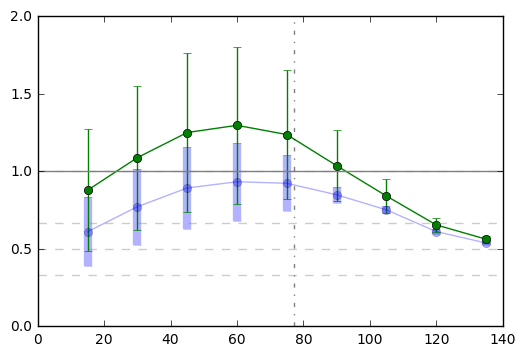

In [121]:
%%time
plot_param_depend(ax=plt.gca(), data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='r maxdisc', N = 10,
                  total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], hi_r) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:10], 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=map(lambda c: lambda l: surf_density(mu_disc(l, mu0=MU0_r, h=hi_r), c, 'r'), np.linspace(1., 12., 10)), 
                  star_density_min=map(lambda c: lambda l: surf_density(mu_disc(l, mu0=MU0_r, h=hi_r), c, 'r'), np.linspace(1., 12., 10)));

Влияние масштаба распределения молекулярного газа (т.е. по сути, какая скорость убывания от $h$):

Wall time: 1min 5s


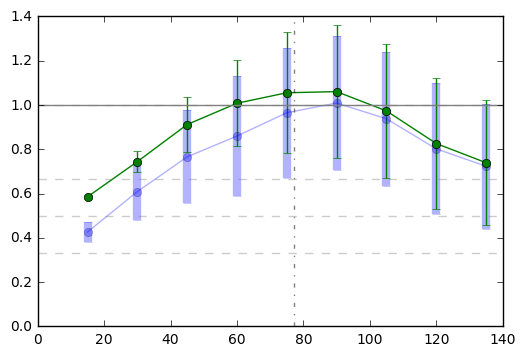

In [122]:
%%time

plot_param_depend(ax=plt.gca(), data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='r maxdisc', N = 6,
                  total_gas_data=[zip(r_g_dens, [He_coeff*(y_interp_(l[0], c*hi_r) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:10] for c in 
                                  [0.25, 0.5, 1., 1.5, 2., 3.]], 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=4.41, band='r'), 
                  star_density_min=lambda l: surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=4.41, band='r'));

Влияние величины молекулярного газа:

Wall time: 1min 5s


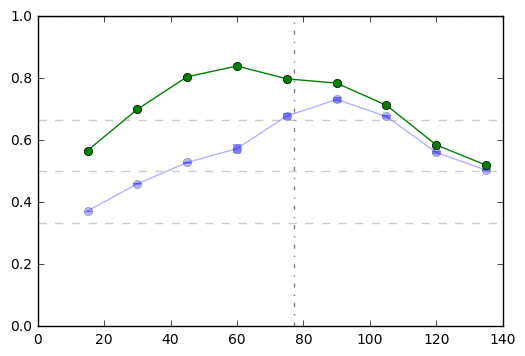

In [123]:
%%time

plot_param_depend(ax=plt.gca(), data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='r maxdisc', N = 6,
                  total_gas_data=[zip(r_g_dens, [He_coeff*(c*y_interp_(l[0], hi_r)/y_interp_(0., hi_r) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:10] for c in 
                                  [0.25, 0.5, 1., 1.5, 2., 3.]], 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=4.41, band='r'), 
                  star_density_min=lambda l: surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=4.41, band='r'));

Замена spl_gas на gas_approx:

Wall time: 22.1 s


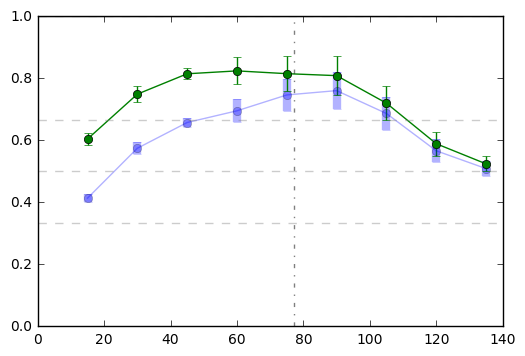

In [124]:
%%time

plot_param_depend(ax=plt.gca(), data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='r maxdisc', N = 2,
                  total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], hi_r) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:10], 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=[spl_gas, gas_approx], 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=4.41, band='r'), 
                  star_density_min=lambda l: surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=4.41, band='r'));

Разные реалистичные дисперсии: 

Wall time: 1min 43s


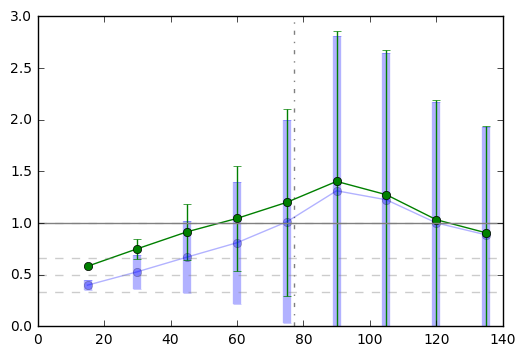

In [125]:
%%time

plot_param_depend(ax=plt.gca(), data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='r maxdisc', N = 10,
                  total_gas_data=zip(r_g_dens, [He_coeff*(y_interp_(l[0], hi_r) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:10], 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=spl_gas, 
                  sound_vel=[[c*np.exp(-2*l/r25) if l < r25 else c*np.exp(-2.) for l in r_g_dens[1:]] for c in list(np.linspace(6., 100., 10))], 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=4.41, band='r'), 
                  star_density_min=lambda l: surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=4.41, band='r'));

### Влияние наклона на результат

Необходимо узнать, как влияет разброс у гле наклона на итоговый результат. К сожалению кроме как вручную это сложно сделать.

In [288]:
# fig = plt.figure(figsize=[10,8])

# gas_approxes = []
# spl_gases = []

# for i in [36., 40.]:
#     incl = i
#     sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)

#     # Данные по кинематике газа Struve, WSRT (не исправлено за наклон)
#     r_wsrt, vel_wsrt, e_vel_wsrt = zip(*np.loadtxt("v_gas_WSRT.dat", float))
#     r_wsrt, vel_wsrt, e_vel_wsrt = correct_rotation_curve(r_wsrt, vel_wsrt, e_vel_wsrt,  0.0, v0, incl)

#     # Данные по кинематике газа Noordermee 2007, WSRT (не исправлено за наклон?)
#     r_noord, vel_noord, e_vel_noord = zip(*np.loadtxt("v_gas_noord.dat", float))
#     r_noord, vel_noord, e_vel_noord = correct_rotation_curve(r_noord, vel_noord, e_vel_noord,  0.0, v0, incl)
    
#     plt.plot(r_wsrt, vel_wsrt, '.-', label="gas Struve")
#     plt.plot(r_noord, vel_noord, '.-', label="gas Noordermeer 2007")

#     gas_approx = poly1d(polyfit(r_ma_n, vel_ma_n, deg=5))
#     test_points = np.linspace(min(r_ma_n), max(r_ma_n), 100)
#     plt.plot(test_points, gas_approx(test_points), '--', label='approx')
#     gas_approxes.append(gas_approx)

#     spl_gas = inter.UnivariateSpline(r_noord, vel_noord, k=3, s=10000.)
#     plt.plot(test_points, spl_gas(test_points), '-', label='spl')
#     spl_gases.append(spl_gas)


# plt.ylim(0, 450)
# plt.legend(loc='lower right');

In [289]:
# fig = plt.figure(figsize=[12, 8])
# for ind, i in enumerate([36., 40.]):
#     incl = i
#     sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)
#     plt.plot(test_points, [epicyclicFreq_real(gas_approxes[ind], x, scale) for x in test_points], '-', label='poly')
#     plt.plot(test_points, [epicyclicFreq_real(spl_gases[ind], x, scale) for x in test_points], '-', label='spline')
#     print epicyclicFreq_real(spl_gases[ind], 10., scale)

# def epicyclicFreq_real_(spl_gas, x, scale):
#     '''продливаем дальше без производной на плато'''
#     if x < 60.:
#         return epicyclicFreq_real(spl_gas, x, scale)
#     else:
#         return sqrt(2)*arctanlaw(x, m,c,d)/(x*scale)
# #     TODO: check scale multiplication
    
# # plt.plot(np.linspace(1., 100., 100), [epicyclicFreq_real_(gas_approx, x, scale) for x in np.linspace(1., 100., 100)], '-', label='contin')

# plt.xlabel('$R, arcsec$')
# plt.ylabel('$\kappa,\, km/s/kpc$', fontsize=15)
# plt.ylim(0, 100)
# plt.legend();

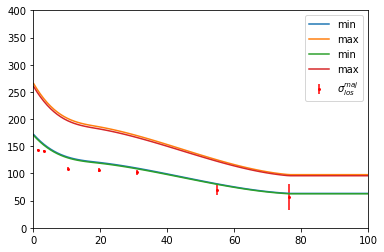

In [290]:
plt.errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$')
for ind, i in enumerate([50., 52.]):
    incl = i
    sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)
#     plt.plot(points, map(sig_R_maj_minmin, points), label = 'minmin')
    plt.plot(points, map(sig_R_maj_min, points), label = 'min')
    plt.plot(points, map(sig_R_maj_max, points), label = 'max')
#     plt.plot(points, map(sig_R_maj_maxmax, points), label = 'maxmax')
#     plt.plot(points, map(sig_R_maj_maxmaxtrue, points), label = 'maxmaxtrue')

plt.legend()
plt.ylim(0,400)
plt.xlim(0,100);

In [291]:
# total_gas_data_ = zip(r_g_dens, [He_coeff*(y_interp_(l[0], hi_r) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:10]
#     total_gas_data_2 = zip(r_g_dens, [He_coeff*(y_interp_2(l[0], hi_r) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:10]

#     plot_2f_vs_1f(ax=axes[4], total_gas_data=total_gas_data_, 
#                   epicycl=epicyclicFreq_real, 
#                   gas_approx=spl_gas, 
#                   sound_vel=sound_vel, 
#                   scale=scale, 
#                   sigma_max=sig_R_maj_max, 
#                   sigma_min=sig_R_maj_min, 
#                   star_density_max=lambda l: surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=4.41, band='r'), 
#                   star_density_min=lambda l: surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=4.41, band='r'), 
#                   data_lim=data_lim, color='g', alpha=0.2, disk_scales=disk_scales, label='r(g-i) maxdisc')

In [295]:
max_coeffs_incl = []

for ind, i in enumerate([50., 52.]):
    incl = i
    sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)

    max_coeffs = {}

    for photom in all_photometry:
        disc_max = 2.2*photom[5]
        max_coeff = 0.85*spl_gas(disc_max)/disc_vel(disc_max, photom[7](0), photom[5], scale)
        submax_coeff = 0.6*spl_gas(disc_max)/disc_vel(disc_max, photom[7](0), photom[5], scale)

        print '{:15s}: M/L was {:2.2f} and for max it equal {:2.2f}, for submax equal {:2.2f}'.format(photom[0], photom[6], photom[6]*max_coeff**2, photom[6]*submax_coeff**2)
        max_coeffs[photom[0]] = [photom[6]*max_coeff**2, photom[6]*submax_coeff**2]
        
    max_coeffs_incl.append(max_coeffs)

Noorder R      : M/L was 2.11 and for max it equal 7.32, for submax equal 3.65
Noorder B      : M/L was 2.52 and for max it equal 8.35, for submax equal 4.16
Noorder R_max  : M/L was 5.00 and for max it equal 7.32, for submax equal 3.65
Mendez-Abreu J : M/L was 1.18 and for max it equal 2.03, for submax equal 1.01
1991 R         : M/L was 2.01 and for max it equal 3.24, for submax equal 1.61
1998 V         : M/L was 2.26 and for max it equal 11.62, for submax equal 5.79
Silchenko V    : M/L was 2.26 and for max it equal 3.92, for submax equal 1.96
califa g (r-i) : M/L was 3.82 and for max it equal 4.53, for submax equal 2.26
califa r (g-i) : M/L was 2.91 and for max it equal 4.51, for submax equal 2.25
califa i (g-r) : M/L was 2.35 and for max it equal 3.90, for submax equal 1.94
Noorder R      : M/L was 2.11 and for max it equal 7.32, for submax equal 3.65
Noorder B      : M/L was 2.52 and for max it equal 8.35, for submax equal 4.16
Noorder R_max  : M/L was 5.00 and for max it equal 

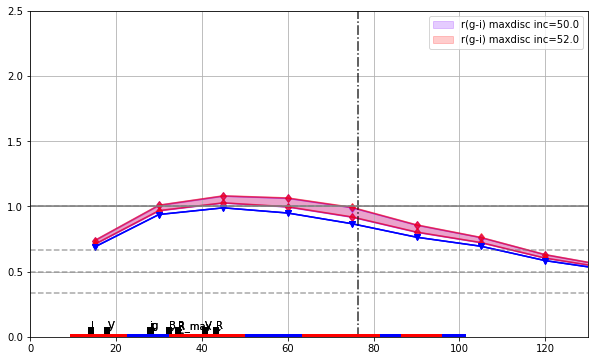

In [298]:
fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

for ind, i in enumerate([50., 52.]):
    incl = i
    sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)
    
    total_gas_data_ = zip(r_g_dens, [He_coeff*(y_interp_(l[0], hi_r) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:10]

    plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data_, 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=max_coeffs_incl[ind]['califa r (g-i)'][0], band='r'), 
                  star_density_min=lambda l: surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=max_coeffs_incl[ind]['califa r (g-i)'][0], band='r'), 
                  data_lim=data_lim, color=cm.rainbow(np.linspace(0, 1, 2))[ind], alpha=0.2, disk_scales=disk_scales, label='r(g-i) maxdisc inc={}'.format(incl))

plt.ylim(0., 2.5)
plt.xlim(0, 130)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid()
plt.savefig('..\\..\pics\\incl_summary\\'+name+'.png', format='png', bbox_inches='tight');

In [299]:
incl = 52.
sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)

### Картинки для статьи

In [300]:
import matplotlib as mpl
mpl.style.use('classic')

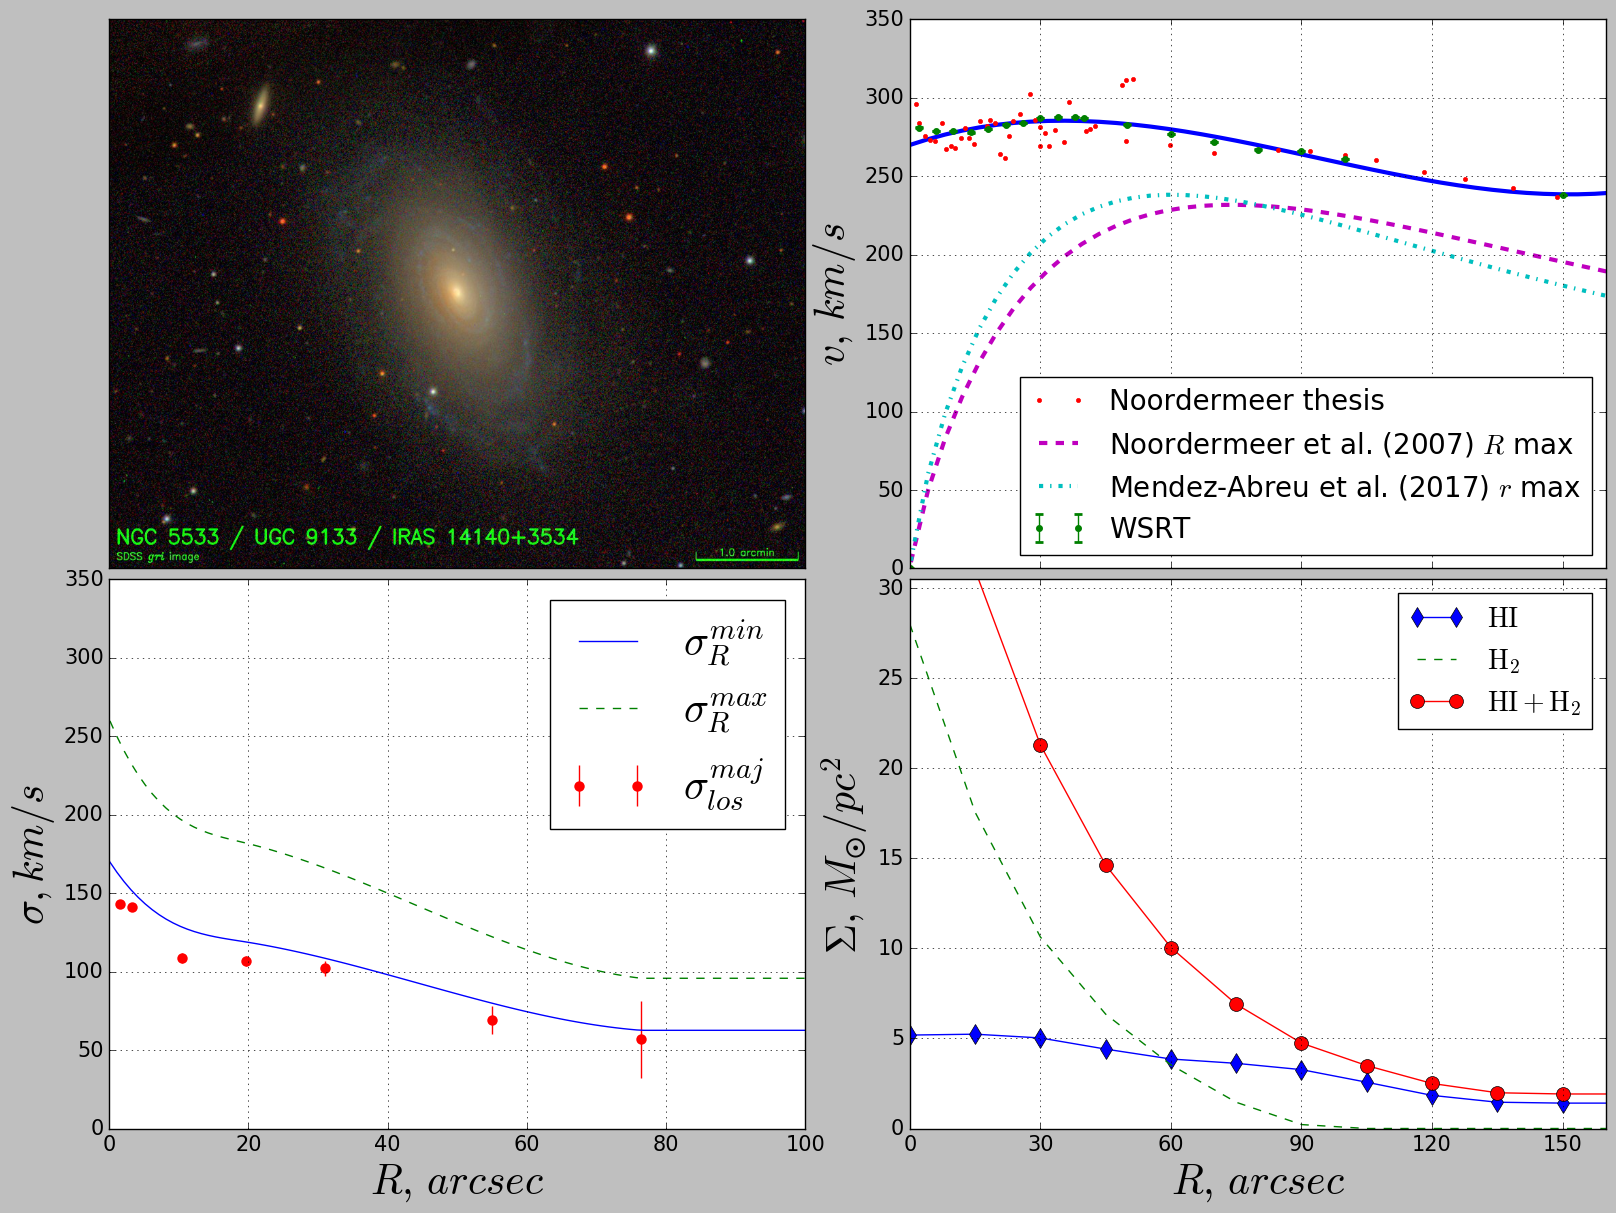

In [307]:
fig = plt.figure(figsize=[16, 12])

ax = plt.subplot2grid((2,2), (0, 0))
ax.imshow(ImagePIL.open('ngc5533_SDSS_labeled.jpeg'), aspect='auto')
ax.set_xticks([])
ax.set_yticks([])

ax = plt.subplot2grid((2,2), (1, 0))
ax.errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$', ms=15)
ax.plot(points, map(sig_R_maj_min, points), label=r'$\sigma_R^{min}$')
ax.plot(points, map(sig_R_maj_max, points), '--', label=r'$\sigma_R^{max}$')
ax.legend(fontsize=30)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

ax.set_ylim(0, 350)
ax.set_xlim(0, 100)  
ax.set_ylabel(r'$\sigma, km/s$', fontsize=30)
ax.set_xlabel(r'$R,\,arcsec$', fontsize=30)
ax.grid()

ax = plt.subplot2grid((2,2), (1, 1))
ax.plot(r_g_dens, gas_dens, 'd-', label=r'$\rm{HI}$', ms=10)
ax.plot(r_g_dens, [y_interp_(l, 0.) for l in r_g_dens], '--', label=r'$\rm{H_2}$')
ax.plot(r_g_dens, [He_coeff*(y_interp_(l[0], 0.) + l[1]) for l in zip(r_g_dens, gas_dens)], 'o-', label=r'$\rm{HI+H_2}$', ms=10)
ax.grid()
ax.set_xlim(0, 160)
ax.set_ylim(0, 30.5)
ax.legend(fontsize=20)

ax.set_ylabel(u'$\Sigma,\,M_\u2609/pc^2$', fontsize=30)
ax.set_xlabel(r'$R,\,arcsec$', fontsize=30)

from matplotlib.ticker import MultipleLocator
ml = MultipleLocator(30)
ax.xaxis.set_major_locator(ml)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

ax = plt.subplot2grid((2,2), (0, 1))
# ax.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=1, label = 'data', ms=15, color='red')
ax.plot(test_points, spl_gas(test_points), '-', lw=3)

# plt.plot(r_wsrt, vel_wsrt, '.', label="gas Struve")
# plt.plot(r_noord, vel_noord, '^', label=r"Noordermeer et al. (2007)")
plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=2, label = 'WSRT')
plt.plot(rn, veln, '.', label = 'Noordermeer thesis')
# plt.plot(r_ma_n, vel_ma_n, 's', label='HI from fig')


# ax.plot(test_points, 0.85*spl_gas(test_points), '--', label='max disc limit')

# ax.plot(r, vel, '.', label = 'Noord thesis')

max_coeffs = {}
for ind, photom in enumerate(all_photometry):
    if photom[0] in ['Noorder R', 'califa r (g-i)']:
        if type(photom[5]) == tuple:
            disc_v = lambda l: disc_vel(l, photom[7][0](0), photom[5][0], scale, Sigma0_2=photom[7][1](0), h_2=photom[5][1])
        else:
            disc_v = lambda l: disc_vel(l, photom[7](0), photom[5], scale)

        values = map(disc_v, test_points)
        disc_max = test_points[values.index(max(values))]

        max_coeff = 0.85*spl_gas(disc_max)/disc_v(disc_max)
        submax_coeff = 0.6*spl_gas(disc_max)/disc_v(disc_max)

        if type(photom[5]) == tuple:
            ax.plot(test_points, map(lambda l: disc_vel(l, max_coeff**2 *photom[7][0](0), photom[5][0], scale, 
                                                         Sigma0_2=max_coeff**2 *photom[7][1](0), h_2=photom[5][1]), test_points), '--', label=r'Gutierrez (2011) $R$', lw=3)
        else:
            if photom[0] == 'califa r (g-i)':
                ax.plot(test_points, map(lambda l: disc_vel(l, max_coeff**2 * photom[7](0), photom[5], scale), test_points), 
                        '-.', label=r'Mendez-Abreu et al. (2017) $r$ max', lw=3, color='c')
            else:
                ax.plot(test_points, map(lambda l: disc_vel(l, max_coeff**2 * photom[7](0), photom[5], scale), test_points), 
                        '--', label=r'Noordermeer et al. (2007) $R$ max', lw=3, color='m')
        

ax.grid(linewidth=0.5)
ax.set_ylim(0, 350)
ax.set_xlim(0, 160)
ax.legend(fontsize=20, loc='lower right')
ax.set_ylabel(r'$v,\,km/s$', fontsize=30)
# ax.set_xlabel(r'$R,\,arcsec$', fontsize=20)

# for tick in ax.yaxis.get_major_ticks():
#     tick.label.set_fontsize(12)
# for tick in ax.xaxis.get_major_ticks():
#     tick.label.set_fontsize(12)

from matplotlib.ticker import MultipleLocator
ml = MultipleLocator(30)
ax.xaxis.set_major_locator(ml)

ax.set_xticklabels([])
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
fig.subplots_adjust(wspace=0.15, hspace=0.02)
plt.savefig(paper_imgs_dir+'5533_obs_data.eps', format='eps', bbox_inches='tight')
plt.savefig(paper_imgs_dir+'5533_obs_data.png', format='png', bbox_inches='tight')
plt.savefig(paper_imgs_dir+'5533_obs_data.pdf', format='pdf', dpi=150, bbox_inches='tight')
plt.show()

## Эксперименты

### WKB приближение

Проверим применимость WKB приближения, т.е. $k\times r \gg 1$:

Для $r$ и total_gas_data_:

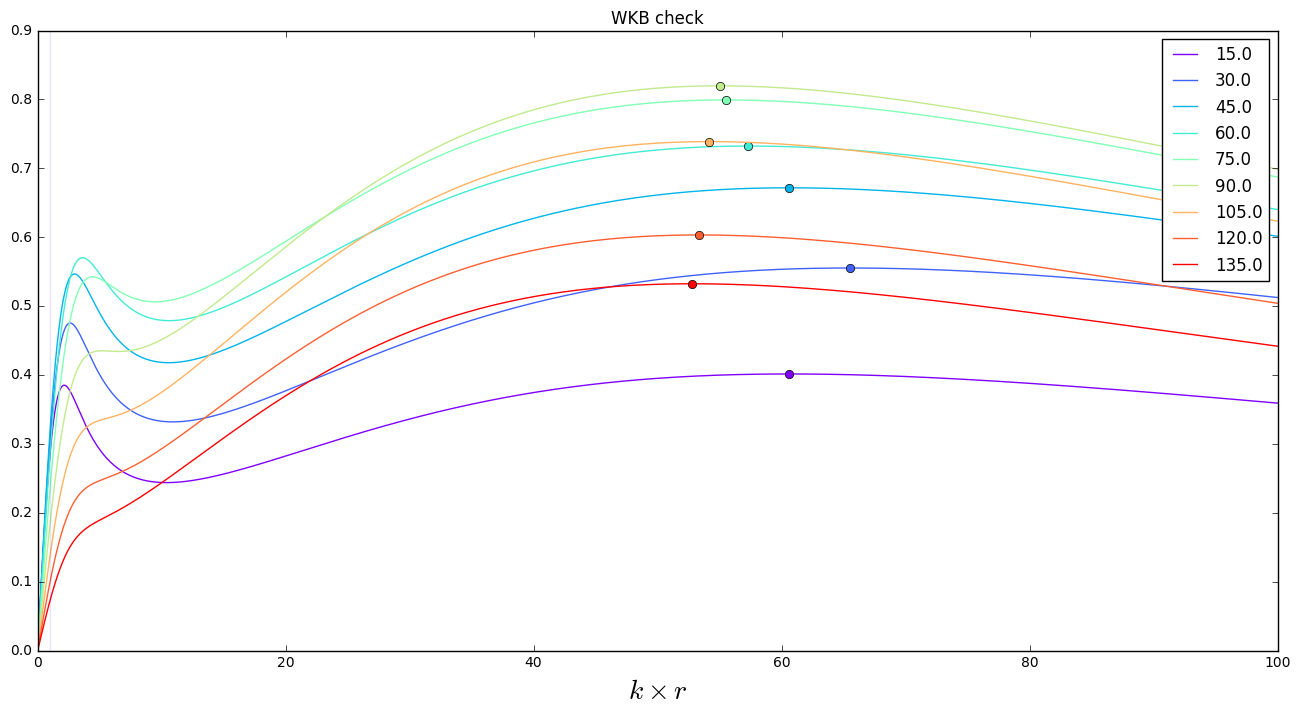

In [120]:
total_gas_data_ = zip(r_g_dens, [He_coeff*(y_interp_(l[0], hi_r) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:10]

plot_WKB_dependencies(r_g_dens=zip(*total_gas_data_)[0], 
                    gas_dens=zip(*total_gas_data_)[1], 
                    epicycl=lambda l: epicyclicFreq_real(spl_gas, l, scale), 
                    sound_vel=sound_vel,
                    star_density=[surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=4.41, band='r') for l in zip(*total_gas_data_)[0]], 
                    sigma=sig_R_maj_max, 
                    scale=scale,
                    krange=arange(0.01, 1000, 0.01))
plt.xlabel(r'$k\times r$', fontsize=20)
plt.title('WKB check')
plt.axvline(x=1, alpha=0.1)
plt.xlim(0, 100);

Исходная зависимость:

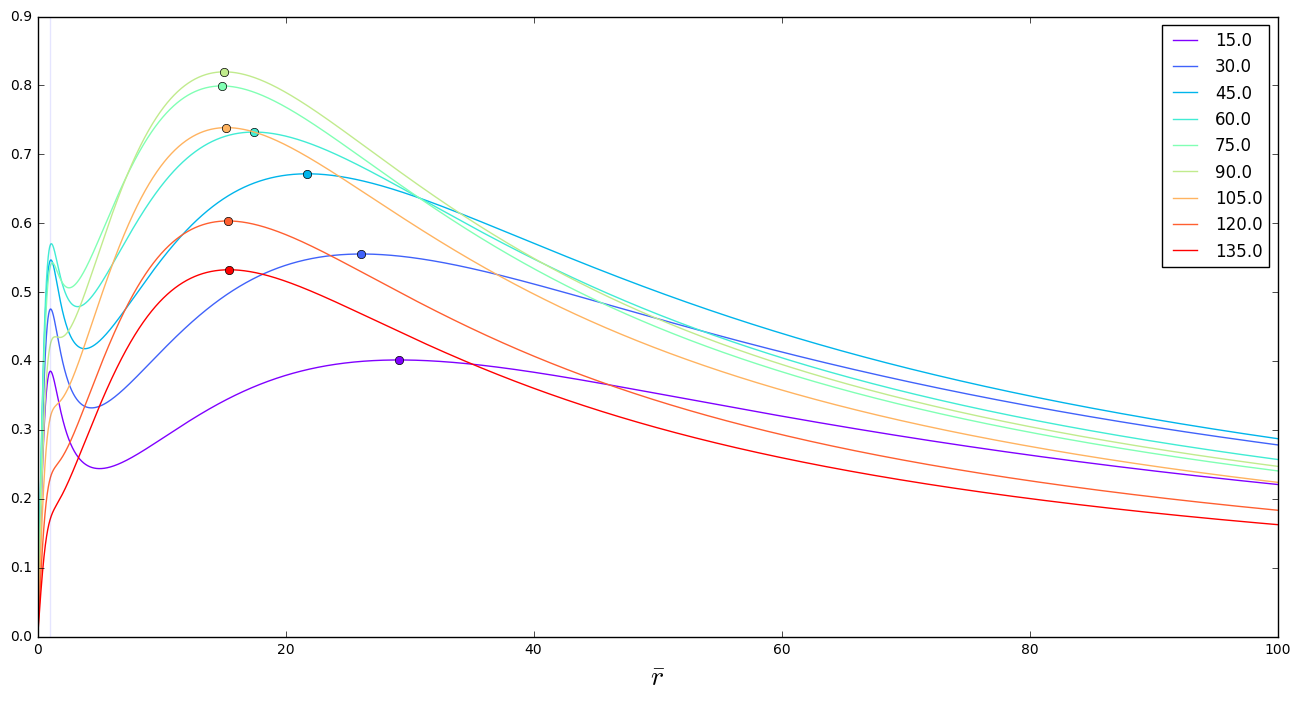

In [121]:
plot_k_dependencies(r_g_dens=zip(*total_gas_data_)[0], 
                    gas_dens=zip(*total_gas_data_)[1], 
                    epicycl=lambda l: epicyclicFreq_real(spl_gas, l, scale), 
                    sound_vel=sound_vel,
                    star_density=[surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=4.41, band='r') for l in zip(*total_gas_data_)[0]], 
                    sigma=sig_R_maj_max,
                    krange=arange(0.01, 1000, 0.01))
plt.xlabel(r'$\bar{r}$', fontsize=20)
plt.axvline(x=1, alpha=0.1)
plt.xlim(0, 100);

Для $R$:

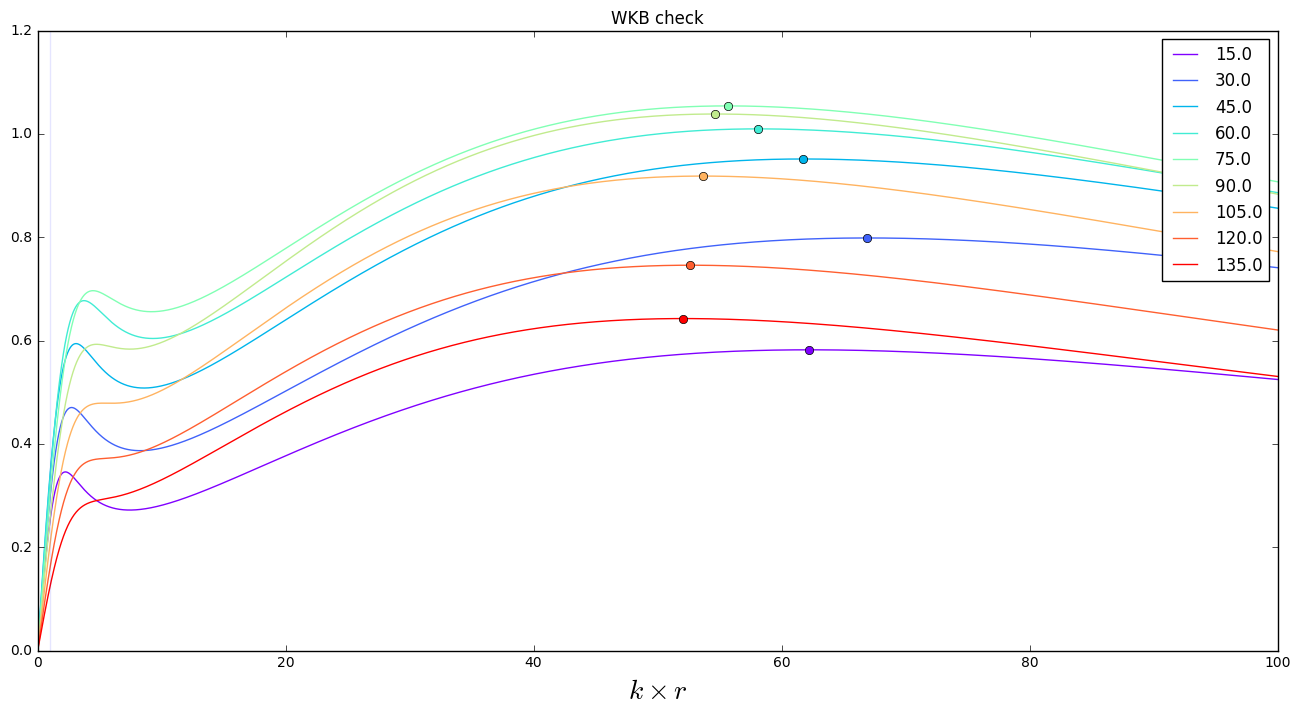

In [122]:
total_gas_data_2 = zip(r_g_dens, [He_coeff*(y_interp_2(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)])[1:10]

plot_WKB_dependencies(r_g_dens=zip(*total_gas_data_2)[0], 
                    gas_dens=zip(*total_gas_data_2)[1], 
                    epicycl=lambda l: epicyclicFreq_real(spl_gas, l, scale), 
                    sound_vel=sound_vel,
                    star_density=[surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=7.15, band='R') for l in zip(*total_gas_data_2)[0]], 
                    sigma=sig_R_maj_max, 
                    scale=scale,
                    krange=arange(0.01, 1000, 0.01))
plt.xlabel(r'$k\times r$', fontsize=20)
plt.title('WKB check')
plt.axvline(x=1, alpha=0.1)
plt.xlim(0, 100);

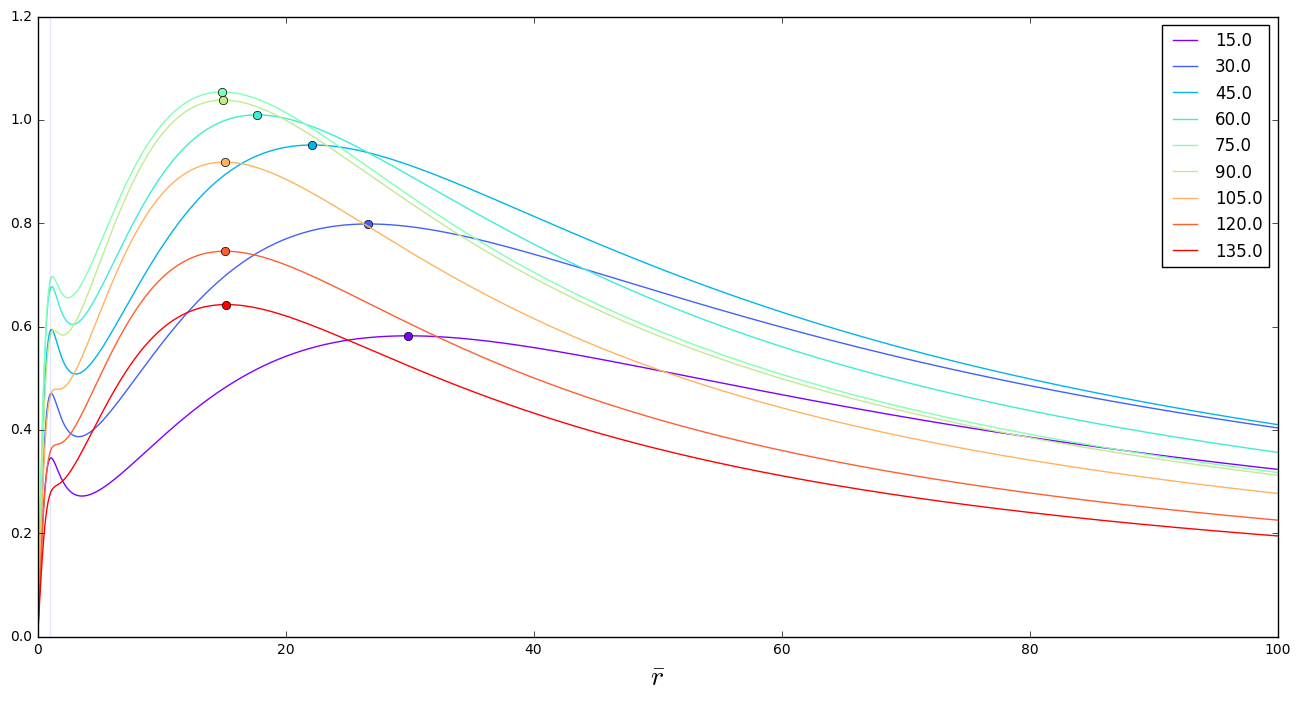

In [123]:
plot_k_dependencies(r_g_dens=zip(*total_gas_data_2)[0], 
                    gas_dens=zip(*total_gas_data_2)[1], 
                    epicycl=lambda l: epicyclicFreq_real(spl_gas, l, scale), 
                    sound_vel=sound_vel,
                    star_density=[surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=7.15, band='R') for l in zip(*total_gas_data_2)[0]], 
                    sigma=sig_R_maj_max,
                    krange=arange(0.01, 1000, 0.01))
plt.xlabel(r'$\bar{r}$', fontsize=20)
plt.axvline(x=1, alpha=0.1)
plt.xlim(0, 100);

### Учет толщины

$$\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{s}}}{\kappa+k^{2}\sigma_{\mathrm{s}}}\,\left\{ \frac{1-\exp(-k\, h_{z}^{\mathrm{s}})}{k\, h_{z}^{\mathrm{s}}}\right\} +\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{g}}}{\kappa+k^{2}c_{\mathrm{g}}}\,\left\{ \frac{1-\exp(-k\, h_{z}^{\mathrm{g}})}{k\, h_{z}^{\mathrm{g}}}\right\} >1$$

$$\begin{array}{rcl}
\sigma_{z}^{2}=\pi Gz_{0}^{\mathrm{s}}(\Sigma_{\mathrm{s}}+\Sigma_{\mathrm{g}})\,,\\
\\
c_{\mathrm{g}}^{2}=\pi Gz_{0}^{\mathrm{g}}(\Sigma_{\mathrm{g}}+\Sigma_{\mathrm{s}})\,.
\end{array}$$

Отсюда можно найти толщины

In [126]:
# %install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%reload_ext version_information

%version_information numpy, scipy, matplotlib

Software versions
Python 2.7.12 64bit [MSC v.1500 64 bit (AMD64)]
IPython 5.1.0
OS Windows 7 6.1.7601 SP1
numpy 1.11.2
scipy 0.18.1
matplotlib 1.5.1
Sat Feb 04 23:54:18 2017 RTZ 2 (зима)